In [1]:
from astropy.io import fits
import numpy as np
from astropy.table import QTable,vstack
import astropy.units as u
import astropy.utils
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import matplotlib.colors
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import lognorm
from scipy.stats import f
from astropy.timeseries import LombScargle
import time
from astropy.visualization import hist
from scipy.optimize import curve_fit
from astropy.timeseries import BoxLeastSquares
from astropy.timeseries import TimeSeries
from astropy.time import Time
from tqdm import tqdm


import functions
#import upsilon

In [2]:
t_zr=QTable.read('t_zr_0307.ecsv')
t_zg=QTable.read('t_zg_0307.ecsv')
t_zr=t_zr[np.isnan(t_zr['LNP_SIG'])==False]
t_zg=t_zg[np.isnan(t_zg['LNP_SIG'])==False]

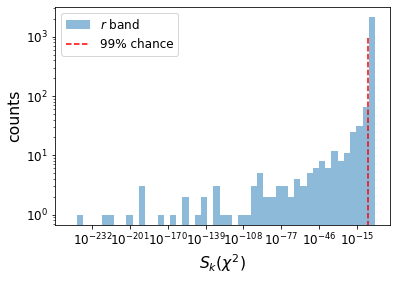

In [3]:
fs=12
sf=np.array(t_zr['sf'])
histo=hist(sf,bins=np.logspace(np.log10(1e-250),np.log10(1),num=50),label='$r$ band',alpha=0.5)
plt.vlines(1/(100*len(t_zr)),0,1000,ls='--',color='r',label='99% chance')
#,histtype='step'
plt.xlabel('$S_k(\chi^2)$',fontsize=fs*1.3)
plt.ylabel('counts',fontsize=fs*1.3)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
#histo

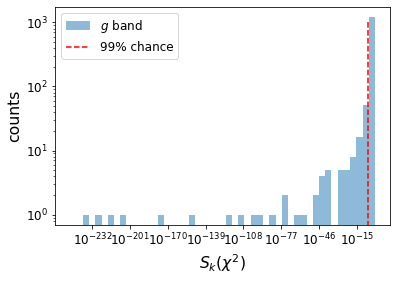

In [4]:
fs=12
sf=np.array(t_zg['sf'])
histo=hist(sf,bins=np.logspace(np.log10(1e-250),np.log10(1),num=50),label='$g$ band',alpha=0.5)
plt.vlines(1/(100*len(t_zr)),0,1000,ls='--',color='r',label='99% chance')
#,histtype='step'
plt.xlabel('$S_k(\chi^2)$',fontsize=fs*1.3)
plt.ylabel('counts',fontsize=fs*1.3)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
#histo

In [5]:
1/(100*len(t_zr))

4.154549231408392e-06

In [6]:
1/(100*len(t_zg))

7.496251874062969e-06

In [7]:
len(t_zr)

2407

In [8]:
len(t_zg)

1334

In [9]:
t_zr=QTable.read('t_zr_0222.ecsv')
t_zg=QTable.read('t_zg_0222.ecsv')
t_zr=t_zr[np.isnan(t_zr['LNP_SIG'])==False]
t_zg=t_zg[np.isnan(t_zg['LNP_SIG'])==False]

var_zr=t_zr[t_zr['sf']<1/(100*len(t_zr))] #99% chance variabe
var_zg=t_zg[t_zg['sf']<1/(100*len(t_zg))] #99% chance variabe

nonvar_zr=t_zr[t_zr['sf']>1/(100*len(t_zr))]
nonvar_zg=t_zg[t_zg['sf']>1/(100*len(t_zg))]

In [10]:
len(var_zr),len(var_zg)

(250, 117)

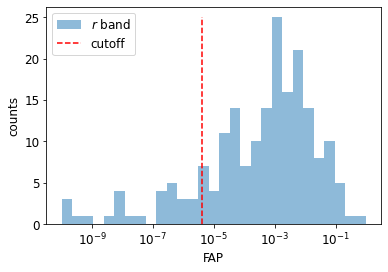

In [11]:
histo=hist(var_zr['LNP_SIG'],bins=np.logspace(np.log10(1e-10),np.log10(1),num=30),label='$r$ band',alpha=0.5)
plt.vlines(1/(100*len(t_zr)),0,25,ls='--',color='r',label='cutoff')
#,histtype='step'
plt.xlabel('FAP',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
plt.gca().set_xscale("log")
#plt.gca().set_yscale("log")
#histo

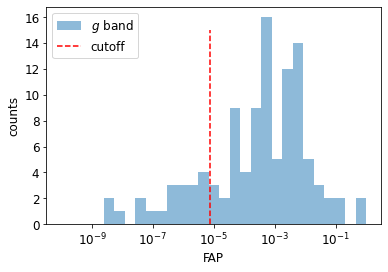

In [12]:
histo=hist(var_zg['LNP_SIG'],bins=np.logspace(np.log10(1e-10),np.log10(1),num=30),label='$g$ band',alpha=0.5)
plt.vlines(1/(100*len(t_zg)),0,15,ls='--',color='r',label='cutoff')
#,histtype='step'
plt.xlabel('FAP',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
plt.gca().set_xscale("log")
#plt.gca().set_yscale("log")
#histo

In [13]:
def cut_LNP_SIG(t,period,LNP_SIG):
    #t=t[(t['period']<period[0])|(t['period']>period[1])]
    #t=t[(t['period']<period[2])|(t['period']>period[3])]
    #if len(period)>4:
        #t=t[(t['period']<period[4])|(t['period']>period[5])]
    t=t[t['LNP_SIG']<LNP_SIG]
    return t

t_zr=cut_LNP_SIG(var_zr,_,1/(100*len(t_zr)))
t_zg=cut_LNP_SIG(var_zg,_,1/(100*len(t_zg)))

In [14]:
len(t_zr),len(t_zg)

(86, 29)

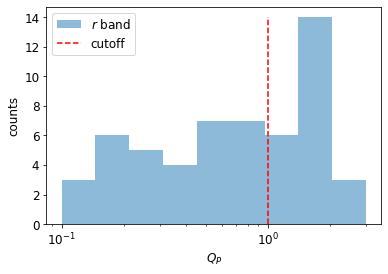

In [15]:
obj=t_zr['power']/t_zr['power_c']
plt.hist(obj, bins=np.logspace(np.log10(0.1),np.log10(3.0), 10),alpha=0.5,label='$r$ band')
plt.vlines(1,0,14,ls='--',color='r',label='cutoff')
plt.xlabel('$Q_P$',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
#plt.gca().set_yscale("log")
plt.gca().set_xscale("log")

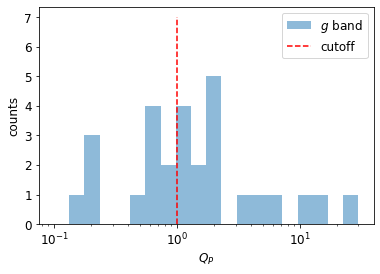

In [16]:
obj=t_zg['power']/t_zg['power_c']
plt.hist(obj, bins=np.logspace(np.log10(0.1),np.log10(30.0), 21),alpha=0.5,label='$g$ band')
plt.vlines(1,0,7,ls='--',color='r',label='cutoff')
plt.xlabel('$Q_P$',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
#plt.gca().set_yscale("log")
plt.gca().set_xscale("log")

In [17]:
obj_zr=t_zr[t_zr['power']/t_zr['power_c']>=1]
obj_zg=t_zg[t_zg['power']/t_zg['power_c']>=1]

In [18]:
len(obj_zr),len(obj_zg)

(53, 18)

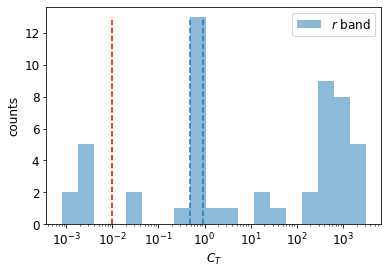

In [19]:
obj=np.abs(obj_zr['period']-obj_zr['period_c'])/obj_zr['period_c']
plt.hist(obj, bins=np.logspace(np.log10(obj[obj!=0].min()),np.log10(obj.max()), 20),alpha=0.5,label='$r$ band')
#plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.vlines((0.49,0.91),0,13,ls='--')
plt.vlines((1e-2),0,13,ls='--',color='r')
plt.xlabel('$C_T$',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
#plt.xlim(0.1,1)

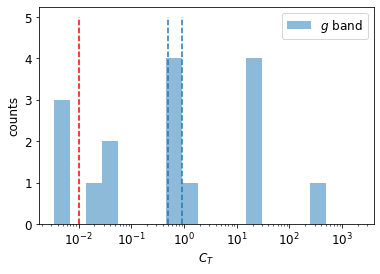

In [20]:
obj=np.abs(obj_zg['period']-obj_zg['period_c'])/obj_zg['period_c']
plt.hist(obj, bins=np.logspace(np.log10(obj[obj!=0].min()),np.log10(obj.max()), 20),alpha=0.5,label='$g$ band')
#plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.vlines((0.49,0.91),0,5,ls='--')
plt.vlines((1e-2),0,5,ls='--',color='r')
plt.xlabel('$C_T$',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)

In [8]:
t_zr=QTable.read('t_zr_0307.ecsv')
t_zg=QTable.read('t_zg_0307.ecsv')

obj_zr=t_zr[(t_zr['var']=='P')]
obj_zg=t_zg[(t_zg['var']=='P')]

In [22]:
obj_zr.show_in_notebook()

In [23]:
np.unique(obj_zr['SourceID']).shape,np.unique(obj_zg['SourceID']).shape

((32,), (9,))

In [24]:
# ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [63]:
def scatter_hist1(x, y, color, marker, alpha, size, label, ax, ax_histx, ax_histy, bins=12):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    #ax.scatter(x, y)
    ax.scatter(x,y,marker=marker,c=color,s=size, alpha=alpha,label=label)

    # x,y hist
    ax_histx.hist(x, histtype='step',density=1, color=color,bins=bins,linewidth=5,alpha=0.8)
    ax_histy.hist(y, histtype='step',density=1, color=color,bins=bins, orientation='horizontal',linewidth=5,alpha=0.8)

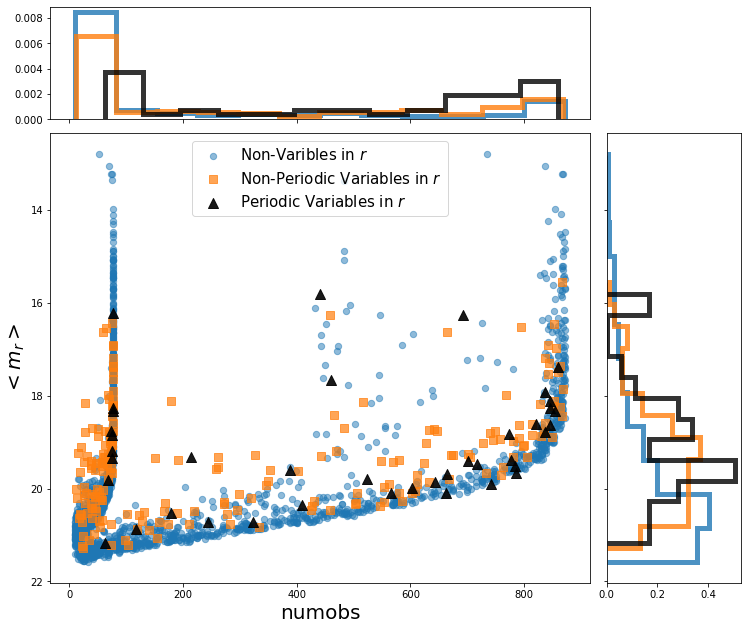

In [64]:
# scatter_hist1(x, y, color, marker, alpha, size, label, ax, ax_histx, ax_histy, bins=25)
# Start with a square Figure.
fig = plt.figure(figsize=(12,10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.invert_yaxis()


ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.


scatter_hist1(t_zr[t_zr['lc_var']=='N']['numobs'],t_zr[t_zr['lc_var']=='N']['mean'],'#1f77b4','o',0.5,40,'Non-Varibles in $r$'
             ,ax, ax_histx, ax_histy)

scatter_hist1(t_zr[t_zr['lc_var']=='V']['numobs'],t_zr[t_zr['lc_var']=='V']['mean'],'#ff7f0e','s',0.7,50,'Non-Periodic Variables in $r$'
             ,ax, ax_histx, ax_histy)

scatter_hist1(t_zr[t_zr['lc_var']=='P']['numobs'],t_zr[t_zr['lc_var']=='P']['mean'],'black','^',0.9,100,'Periodic Variables in $r$'
             ,ax, ax_histx, ax_histy)


ax.set_xlabel('numobs',fontsize=20)
ax.set_ylabel('$<m_r>$',fontsize=20)
ax.legend(loc=0,fontsize=15)

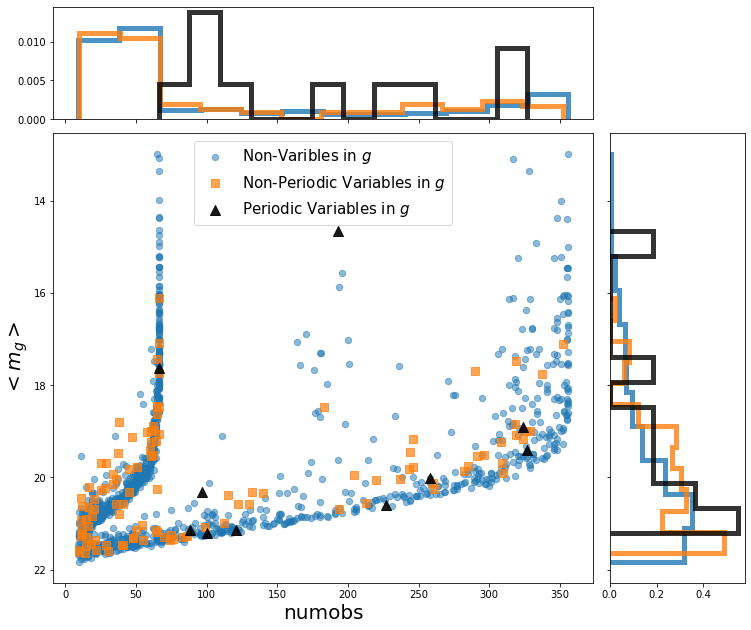

In [65]:
# scatter_hist1(x, y, color, marker, alpha, size, label, ax, ax_histx, ax_histy, bins=25)
# Start with a square Figure.
fig = plt.figure(figsize=(12,10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.invert_yaxis()


ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.


scatter_hist1(t_zg[t_zg['lc_var']=='N']['numobs'],t_zg[t_zg['lc_var']=='N']['mean'],'#1f77b4','o',0.5,40,'Non-Varibles in $g$'
             ,ax, ax_histx, ax_histy)

scatter_hist1(t_zg[t_zg['lc_var']=='V']['numobs'],t_zg[t_zg['lc_var']=='V']['mean'],'#ff7f0e','s',0.7,50,'Non-Periodic Variables in $g$'
             ,ax, ax_histx, ax_histy)

scatter_hist1(t_zg[t_zg['lc_var']=='P']['numobs'],t_zg[t_zg['lc_var']=='P']['mean'],'black','^',0.9,100,'Periodic Variables in $g$'
             ,ax, ax_histx, ax_histy)


ax.set_xlabel('numobs',fontsize=20)
ax.set_ylabel('$<m_g>$',fontsize=20)
ax.legend(loc=0,fontsize=15)

In [66]:
t_zr=QTable.read('t_zr_0307.ecsv')
t_zg=QTable.read('t_zg_0307.ecsv')

In [67]:
len(t_zr[t_zr['var_flag']==1]),len(t_zg[t_zg['var_flag']==1])

(1, 4)

In [8]:
t_zr=QTable.read('t_zr_0307.ecsv')
t_zg=QTable.read('t_zg_0307.ecsv')
t_zr=t_zr[np.isnan(t_zr['LNP_SIG'])==False]
t_zg=t_zg[np.isnan(t_zg['LNP_SIG'])==False]

In [9]:
var_zr=t_zr[(t_zr['var']=='V')|(t_zr['var']=='P')]
var_zg=t_zg[(t_zg['var']=='V')|(t_zg['var']=='P')]
obj_zr=t_zr[t_zr['var']=='P']
obj_zg=t_zg[t_zg['var']=='P']

In [10]:
nonvar_zr=t_zr[t_zr['var']=='N']
nonvar_zg=t_zg[t_zg['var']=='N']

In [61]:
len(np.unique(t_zr['SourceID'])),len(np.unique(t_zg['SourceID'])),len(np.intersect1d(np.unique(t_zr['SourceID']),np.unique(t_zg['SourceID'])))

(1516, 864, 821)

In [62]:
len(np.unique(var_zr['SourceID'])),len(np.unique(var_zg['SourceID'])),len(np.intersect1d(np.unique(var_zr['SourceID']),np.unique(var_zg['SourceID'])))

(187, 97, 42)

In [63]:
len(np.unique(obj_zr['SourceID'])),len(np.unique(obj_zg['SourceID'])),len(np.intersect1d(np.unique(obj_zr['SourceID']),np.unique(obj_zg['SourceID'])))

(32, 9, 2)

In [5]:
unobj_zr=var_zr[np.isin(var_zr['SourceID'],obj_zr['SourceID'])==0]
unobj_zg=var_zg[np.isin(var_zg['SourceID'],obj_zg['SourceID'])==0]

In [65]:
len(np.unique(unobj_zr['SourceID'])),len(np.unique(unobj_zg['SourceID'])),len(np.intersect1d(np.unique(unobj_zr['SourceID']),np.unique(unobj_zg['SourceID'])))

(155, 88, 35)

In [66]:
len(np.unique(t_zr[np.isin(t_zr['SourceID'],t_zg['SourceID'])==0]['SourceID']))

695

In [67]:
len(np.unique(t_zg[np.isin(t_zg['SourceID'],t_zr['SourceID'])==0]['SourceID']))

43

In [68]:
len(np.unique(var_zr[np.isin(var_zr['SourceID'],t_zg['SourceID'])==0]['SourceID']))

84

In [69]:
len(np.unique(var_zg[np.isin(var_zg['SourceID'],t_zr['SourceID'])==0]['SourceID']))

18

In [70]:
len(np.unique(obj_zr[np.isin(obj_zr['SourceID'],t_zg['SourceID'])==0]['SourceID']))

15

In [71]:
len(np.unique(obj_zg[np.isin(obj_zg['SourceID'],t_zr['SourceID'])==0]['SourceID']))

0

In [72]:
len(np.unique(unobj_zr[np.isin(unobj_zr['SourceID'],t_zg['SourceID'])==0]['SourceID']))

69

In [73]:
len(np.unique(unobj_zg[np.isin(unobj_zg['SourceID'],t_zr['SourceID'])==0]['SourceID']))

18

In [6]:
t_color=QTable.read('t_color_0912.ecsv')

In [7]:
t_color['mean_color'][~np.isnan(t_color['mean_color'])].mean()

1.0785452662794939

In [14]:
def sourcefy(t):
    mask=np.zeros(len(t))+1
    for i,row in enumerate(t):
        copy=t[t['SourceID']==row['SourceID']]
        if len(copy)>1:
            if row['OID']!=copy['OID'][copy['numobs'].argmax()]:
                mask[i]=0
    t=t[mask==1]
    return t

In [77]:
t=sourcefy(nonvar_zr)

In [78]:
len(t),len(t[t['shape']=='g1']),len(t[t['shape']=='gu']),len(t[t['shape']=='g2'])

(1329, 974, 303, 52)

In [79]:
t=sourcefy(nonvar_zg)
len(t),len(t[t['shape']=='g1']),len(t[t['shape']=='gu']),len(t[t['shape']=='g2'])

(767, 545, 176, 46)

In [80]:
t=sourcefy(obj_zr)
len(t),len(t[t['shape']=='g1']),len(t[t['shape']=='gu']),len(t[t['shape']=='g2'])

(32, 14, 4, 14)

In [81]:
t=sourcefy(obj_zg)
len(t),len(t[t['shape']=='g1']),len(t[t['shape']=='gu']),len(t[t['shape']=='g2'])

(9, 8, 0, 1)

In [82]:
t=sourcefy(unobj_zr)
len(t),len(t[t['shape']=='g1']),len(t[t['shape']=='gu']),len(t[t['shape']=='g2'])

(155, 104, 25, 26)

In [83]:
t=sourcefy(unobj_zg)
len(t),len(t[t['shape']=='g1']),len(t[t['shape']=='gu']),len(t[t['shape']=='g2'])

(88, 50, 24, 14)

In [84]:
t=sourcefy(nonvar_zr)

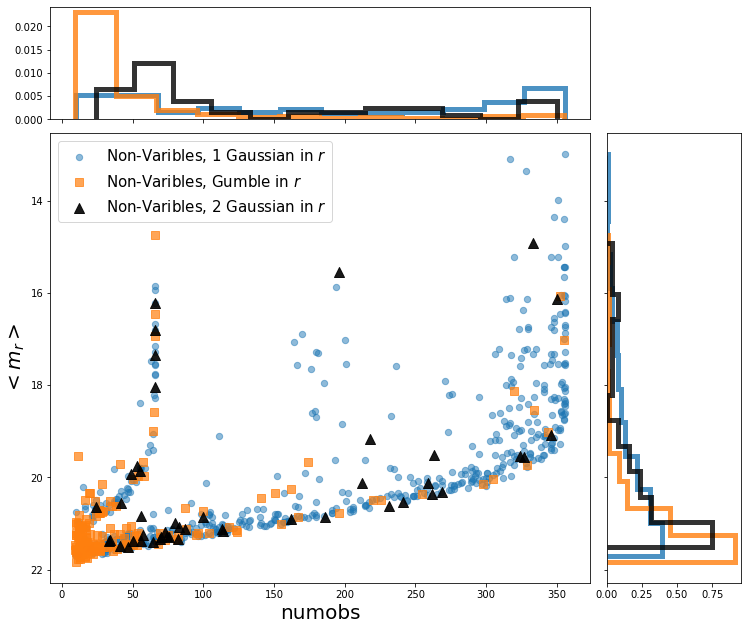

In [87]:
# scatter_hist1(x, y, color, marker, alpha, size, label, ax, ax_histx, ax_histy, bins=25)
# Start with a square Figure.
fig = plt.figure(figsize=(12,10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.invert_yaxis()


ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.


scatter_hist1(t[t['shape']=='g1']['numobs'],t[t['shape']=='g1']['mean'],'#1f77b4','o',0.5,40,'Non-Varibles, 1 Gaussian in $r$'
             ,ax, ax_histx, ax_histy)

scatter_hist1(t[t['shape']=='gu']['numobs'],t[t['shape']=='gu']['mean'],'#ff7f0e','s',0.7,50,'Non-Varibles, Gumble in $r$'
             ,ax, ax_histx, ax_histy)

scatter_hist1(t[t['shape']=='g2']['numobs'],t[t['shape']=='g2']['mean'],'black','^',0.9,100,'Non-Varibles, 2 Gaussian in $r$'
             ,ax, ax_histx, ax_histy)


ax.set_xlabel('numobs',fontsize=20)
ax.set_ylabel('$<m_r>$',fontsize=20)
ax.legend(loc=0,fontsize=15)

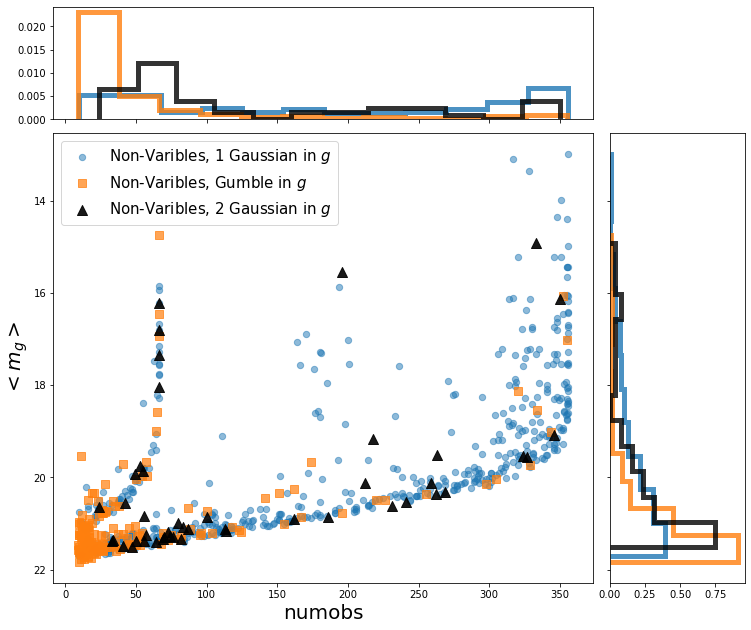

In [88]:
# scatter_hist1(x, y, color, marker, alpha, size, label, ax, ax_histx, ax_histy, bins=25)
# Start with a square Figure.
fig = plt.figure(figsize=(12,10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.invert_yaxis()


ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.

t=sourcefy(nonvar_zg)
scatter_hist1(t[t['shape']=='g1']['numobs'],t[t['shape']=='g1']['mean'],'#1f77b4','o',0.5,40,'Non-Varibles, 1 Gaussian in $g$'
             ,ax, ax_histx, ax_histy)

scatter_hist1(t[t['shape']=='gu']['numobs'],t[t['shape']=='gu']['mean'],'#ff7f0e','s',0.7,50,'Non-Varibles, Gumble in $g$'
             ,ax, ax_histx, ax_histy)

scatter_hist1(t[t['shape']=='g2']['numobs'],t[t['shape']=='g2']['mean'],'black','^',0.9,100,'Non-Varibles, 2 Gaussian in $g$'
             ,ax, ax_histx, ax_histy)


ax.set_xlabel('numobs',fontsize=20)
ax.set_ylabel('$<m_g>$',fontsize=20)
ax.legend(loc=0,fontsize=15)

In [11]:
t_color=QTable.read('t_color_0912.ecsv')

In [17]:
t_color[t_color['mean_color']>1.9]

<QTable length=3>
SourceID     mean_color     ...     max_mag_g          min_mag_g    
 int32        float64       ...      float64            float64     
-------- ------------------ ... ------------------ -----------------
     242  2.533744159497713 ...  21.72011947631836 20.21246337890625
     577 2.2106707436697826 ...  22.01458740234375 21.47152328491211
    1259 2.0366934172961177 ... 21.908727645874023 20.51747703552246

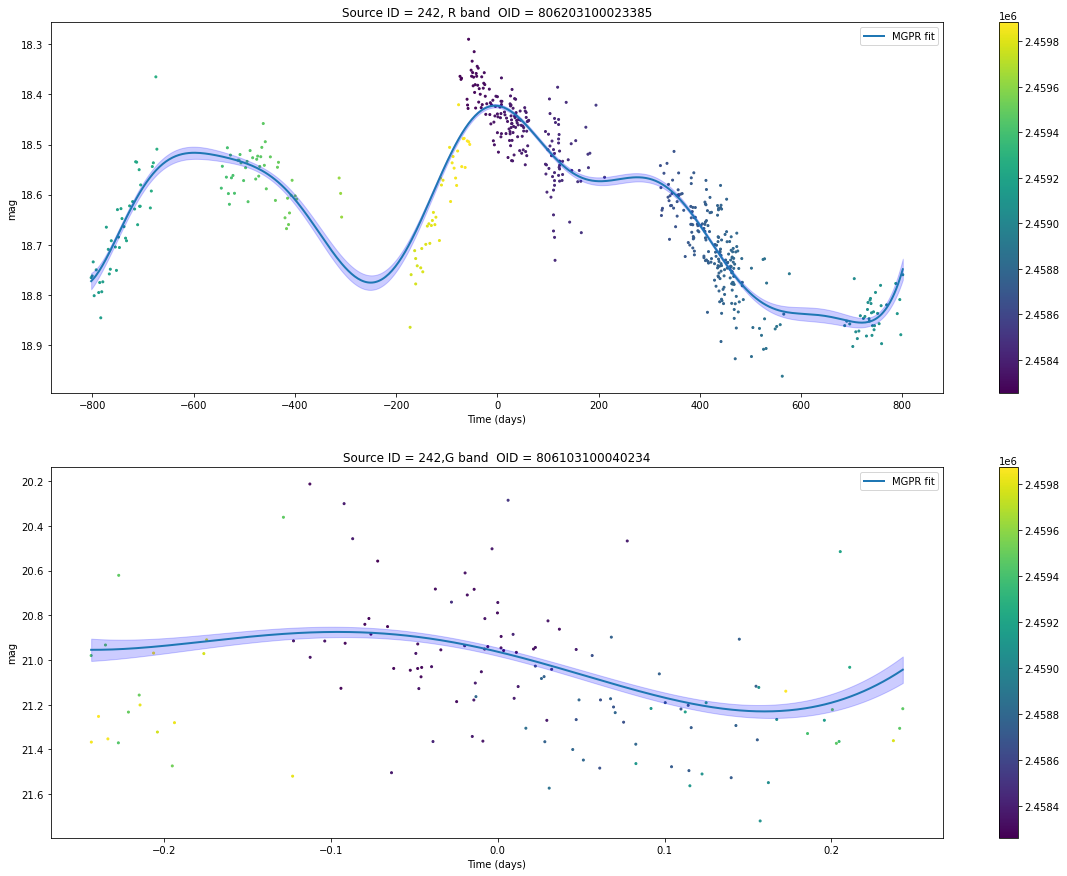

In [23]:
functions.MGPRfit(242)

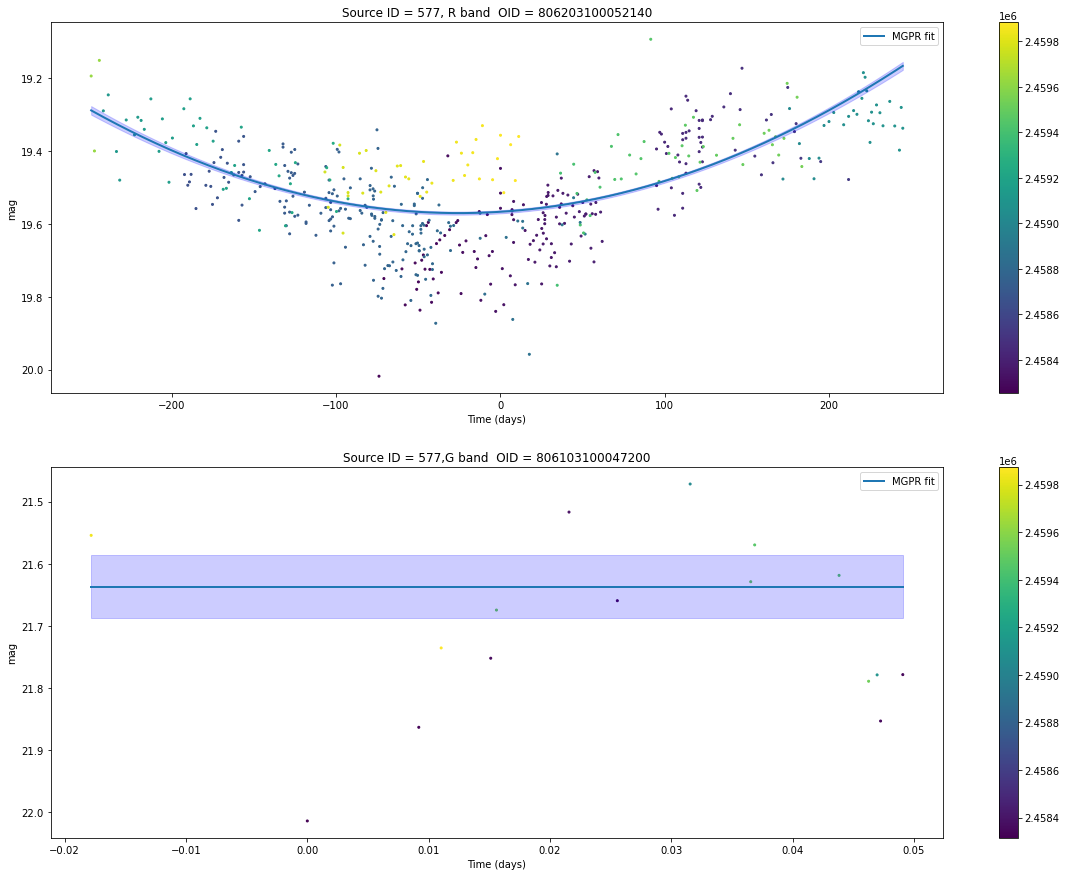

In [22]:
functions.MGPRfit(577)

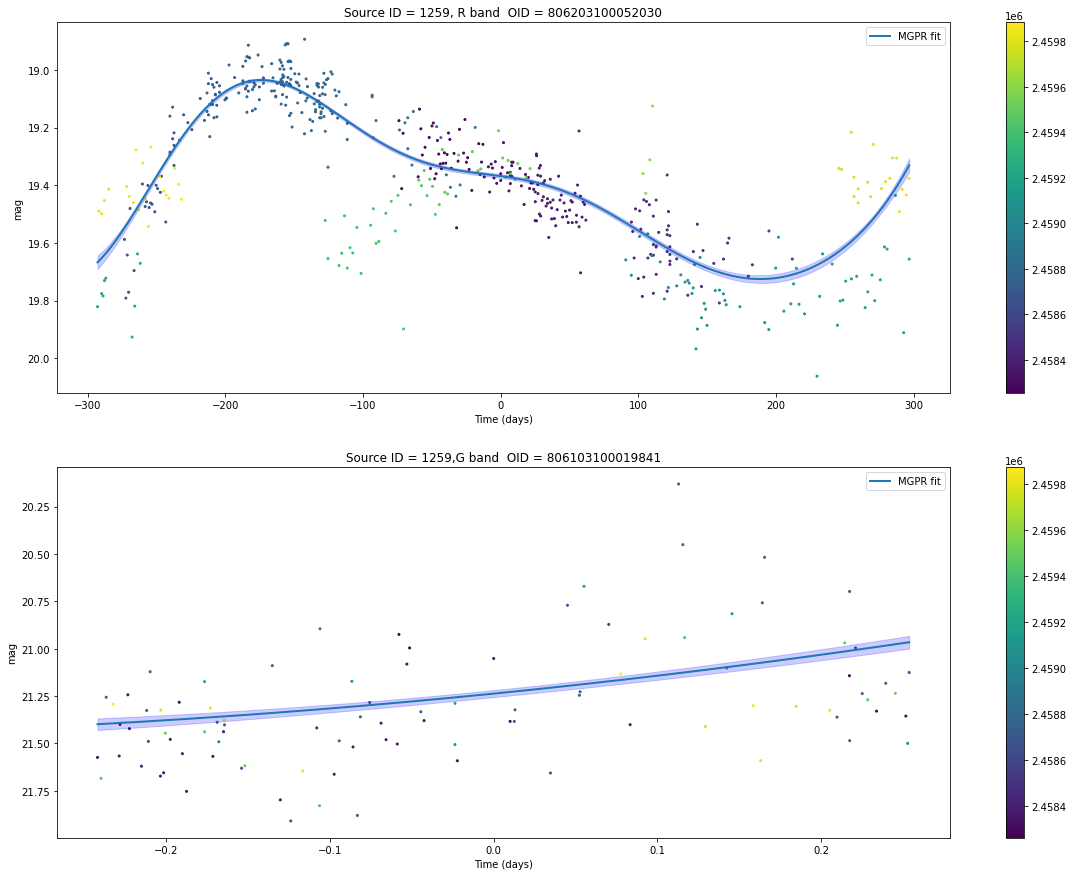

In [21]:
functions.MGPRfit(1259)

In [30]:
def scatter_hist(x, y, xerr, yerr, color, alpha, markersize, label, ax, ax_histx, ax_histy, bins=10):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    #ax.scatter(x, y)
    ax.errorbar(x,y,xerr=xerr,yerr=yerr,fmt='o',color=color,ecolor='lightgray', elinewidth=3, capsize=0,markersize=markersize, alpha=alpha,label=label)

    # x,y hist
    ax_histx.hist(x, histtype='step',density=1, color=color,bins=bins,linewidth=5,alpha=alpha)
    ax_histy.hist(y, histtype='step',density=1, color=color,bins=bins, orientation='horizontal',linewidth=5,alpha=alpha)

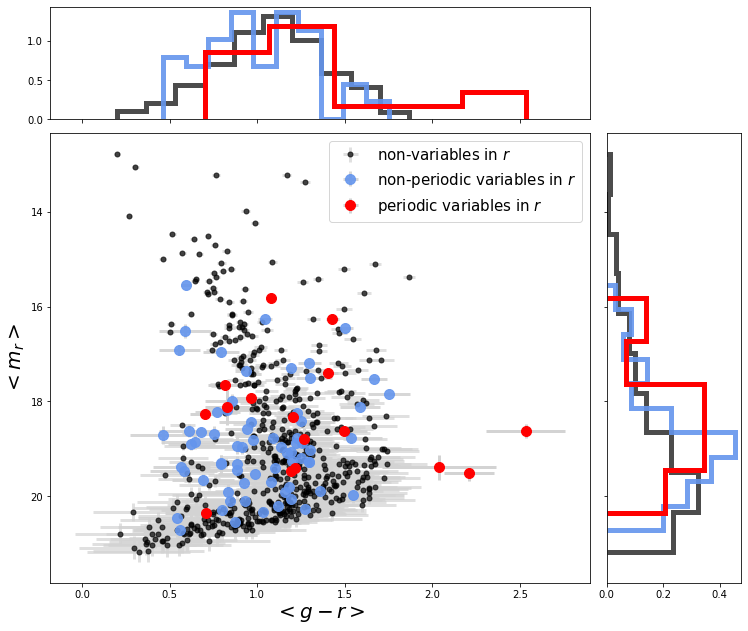

In [106]:
# Start with a square Figure.
fig = plt.figure(figsize=(12,10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.invert_yaxis()


ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.

# nonvar_zr
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(nonvar_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

scatter_hist(t_plot['mean_color'], t_plot['mean_mag_r'],t_plot['std_color'],t_plot['std_mag_r'],'black',0.7,5,'non-variables in $r$'
             ,ax, ax_histx, ax_histy)

# unobj_zr
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(unobj_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

scatter_hist(t_plot['mean_color'], t_plot['mean_mag_r'],t_plot['std_color'],t_plot['std_mag_r'],'cornflowerblue',0.9,10,'non-periodic variables in $r$'
             ,ax, ax_histx, ax_histy)

# obj_zr
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(obj_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

scatter_hist(t_plot['mean_color'], t_plot['mean_mag_r'],t_plot['std_color'],t_plot['std_mag_r'],'red',1,10,'periodic variables in $r$'
             ,ax, ax_histx, ax_histy, bins=5)

ax.set_xlabel('$<g - r>$',fontsize=20)
ax.set_ylabel('$<m_r>$',fontsize=20)
ax.legend(loc=0,fontsize=15)

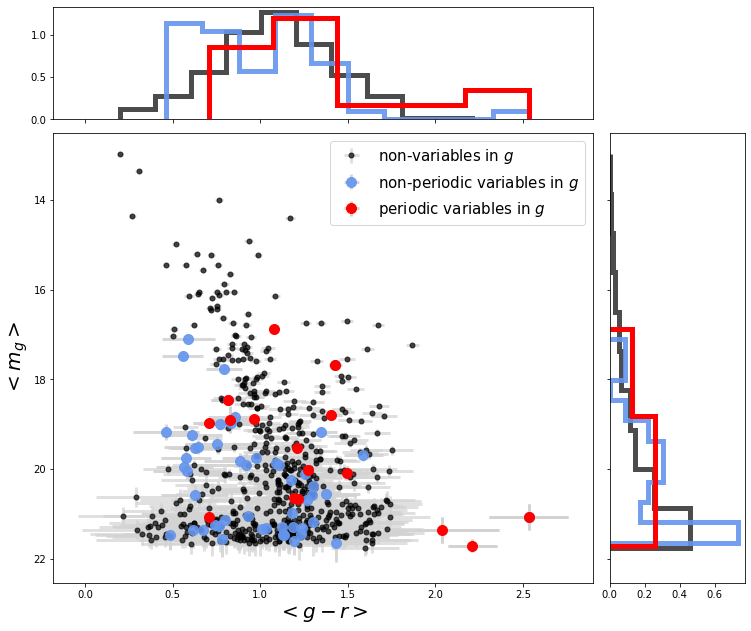

In [107]:
# Start with a square Figure.
fig = plt.figure(figsize=(12,10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.invert_yaxis()


ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.

# nonvar_zr
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(nonvar_zg['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

scatter_hist(t_plot['mean_color'], t_plot['mean_mag_g'],t_plot['std_color'],t_plot['std_mag_g'],'black',0.7,5,'non-variables in $g$'
             ,ax, ax_histx, ax_histy)

# unobj_zr
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(unobj_zg['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

scatter_hist(t_plot['mean_color'], t_plot['mean_mag_g'],t_plot['std_color'],t_plot['std_mag_g'],'cornflowerblue',0.9,10,'non-periodic variables in $g$'
             ,ax, ax_histx, ax_histy)

# obj_zr
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(obj_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

scatter_hist(t_plot['mean_color'], t_plot['mean_mag_g'],t_plot['std_color'],t_plot['std_mag_g'],'red',1,10,'periodic variables in $g$'
             ,ax, ax_histx, ax_histy,bins=5)

ax.set_xlabel('$<g - r>$',fontsize=20)
ax.set_ylabel('$<m_g>$',fontsize=20)
ax.legend(loc=0,fontsize=15)

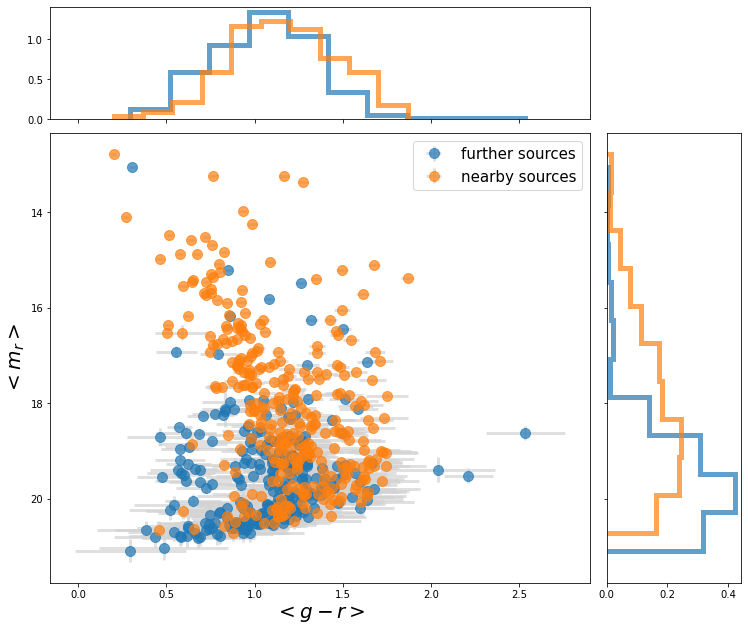

In [31]:
# Start with a square Figure.
fig = plt.figure(figsize=(12,10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.invert_yaxis()


ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.

t_zr_gaia=t_zr[t_zr['Gaia_count']>0]

# inside IC 10
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(t_zr_gaia[t_zr_gaia['Plxflag']==0]['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

scatter_hist(t_plot['mean_color'], t_plot['mean_mag_r'],t_plot['std_color'],t_plot['std_mag_r'],'#1f77b4',0.7,10,'further sources'
             ,ax, ax_histx, ax_histy)

# outside IC 10
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(t_zr_gaia[t_zr_gaia['Plxflag']==1]['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
scatter_hist(t_plot['mean_color'], t_plot['mean_mag_r'],t_plot['std_color'],t_plot['std_mag_r'],'#ff7f0e',0.7,10,'nearby sources'
             ,ax, ax_histx, ax_histy)

ax.set_xlabel('$<g - r>$',fontsize=20)
ax.set_ylabel('$<m_r>$',fontsize=20)
ax.legend(loc=0,fontsize=15)

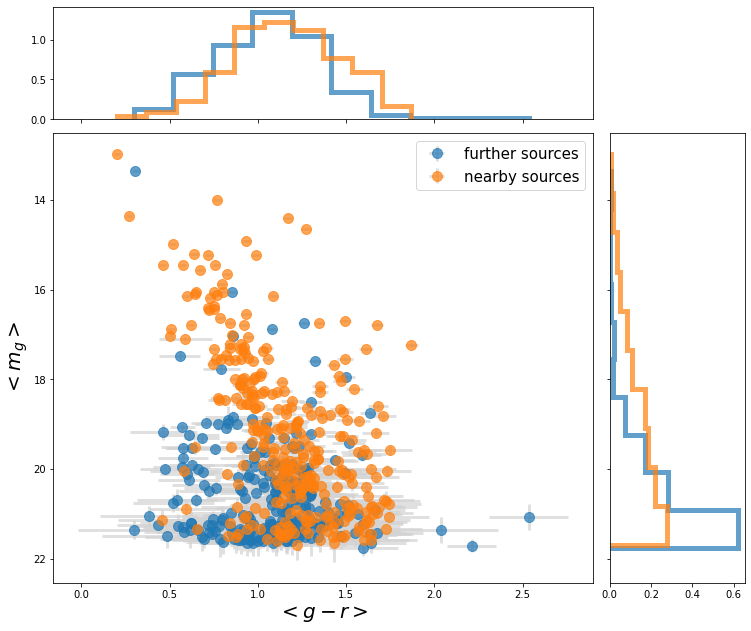

In [32]:
# Start with a square Figure.
fig = plt.figure(figsize=(12,10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.invert_yaxis()


ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.

t_zg_gaia=t_zg[t_zg['Gaia_count']>0]

# inside IC 10
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(t_zg_gaia[t_zg_gaia['Plxflag']==0]['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

scatter_hist(t_plot['mean_color'], t_plot['mean_mag_g'],t_plot['std_color'],t_plot['std_mag_g'],'#1f77b4',0.7,10,'further sources'
             ,ax, ax_histx, ax_histy)

# outside IC 10
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(t_zg_gaia[t_zg_gaia['Plxflag']==1]['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
scatter_hist(t_plot['mean_color'], t_plot['mean_mag_g'],t_plot['std_color'],t_plot['std_mag_g'],'#ff7f0e',0.7,10,'nearby sources'
             ,ax, ax_histx, ax_histy)

ax.set_xlabel('$<g - r>$',fontsize=20)
ax.set_ylabel('$<m_g>$',fontsize=20)
ax.legend(loc=0,fontsize=15)

In [9]:
for tp in np.unique(t_zr['type']):
    if tp!='--':
        count=len(sourcefy(t_zr[t_zr['type']==tp]))
        color=t_color[np.isin(t_color['SourceID'],np.unique(t_zr[t_zr['type']==tp]['SourceID']))]
        colorcount=len(color[~np.isnan(color['mean_color'])])
        print(tp,':',count,',',colorcount)

C* : 14 , 1
Cl* : 57 , 31
Em* : 50 , 31
GinGroup : 1 , 1
HII : 33 , 12
HIshell : 2 , 0
MIR : 2 , 0
Maser : 1 , 0
MolCld : 2 , 0
PN?_Candidate : 8 , 4
PartofG : 2 , 1
Radio : 6 , 2
SNR : 1 , 1
SNR?_Candidate : 1 , 0
Star : 24 , 11
WR* : 18 , 5
WR*_Candidate : 1 , 0
X : 1 , 1
multiple_object : 1 , 1


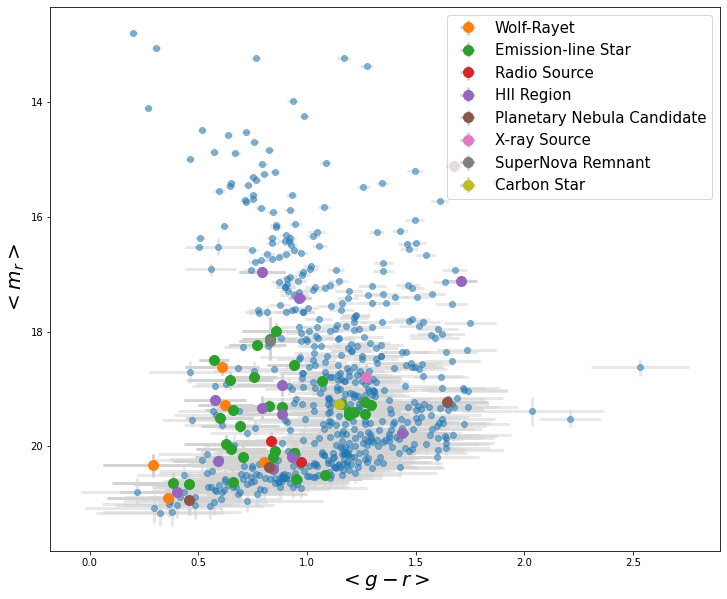

In [13]:
plt.figure(figsize=(12,10))
plt.gca().invert_yaxis()
plt.xlabel('$<g - r>$',fontsize=20)
plt.ylabel('$<m_r>$',fontsize=20)
alpha=1

# all
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(t_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
plt.errorbar(t_plot['mean_color'],t_plot['mean_mag_r'],xerr=t_plot['std_color'],yerr=t_plot['std_mag_r'],fmt='o',
             ecolor='lightgray', elinewidth=3, capsize=0,alpha=0.5)

types=['WR*','Em*','Radio','HII','PN?_Candidate','X','SNR','C*']
names=['Wolf-Rayet','Emission-line Star','Radio Source','HII Region','Planetary Nebula Candidate','X-ray Source','SuperNova Remnant','Carbon Star']

for i,tp in enumerate(types):
    t_plot=t_color[np.isin(t_color['SourceID'],np.unique(t_zr[t_zr['type']==tp]['SourceID']))]
    t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
    plt.errorbar(t_plot['mean_color'],t_plot['mean_mag_r'],xerr=t_plot['std_color'],yerr=t_plot['std_mag_r'],fmt='o',markersize=10,
             ecolor='lightgray', elinewidth=3, capsize=0,alpha=alpha,label=names[i])


#plt.xlim(0,2)
#plt.ylim(21,18)
plt.legend(loc=0,fontsize=15)

In [11]:
for tp in np.unique(t_zg['type']):
    if tp!='--':
        count=len(sourcefy(t_zg[t_zg['type']==tp]))
        color=t_color[np.isin(t_color['SourceID'],np.unique(t_zg[t_zg['type']==tp]['SourceID']))]
        colorcount=len(color[~np.isnan(color['mean_color'])])
        print(tp,':',count,',',colorcount)

C* : 5 , 2
Cl* : 46 , 32
Em* : 40 , 31
GinGroup : 1 , 1
HII : 16 , 11
PN : 1 , 0
PN?_Candidate : 6 , 4
PartofG : 2 , 1
Radio : 2 , 1
SNR : 3 , 2
Star : 12 , 10
WR* : 16 , 5
X : 1 , 1
multiple_object : 2 , 1


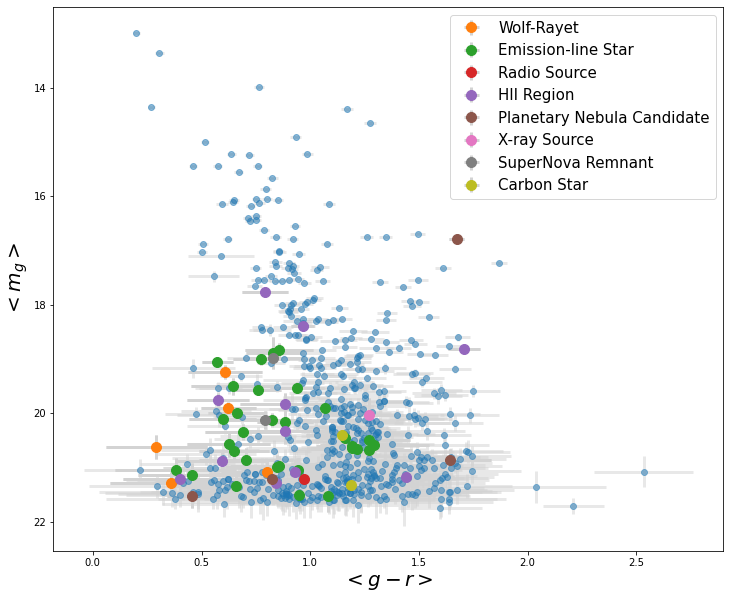

In [14]:
plt.figure(figsize=(12,10))
plt.gca().invert_yaxis()
plt.xlabel('$<g - r>$',fontsize=20)
plt.ylabel('$<m_g>$',fontsize=20)
alpha=1

# all
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(t_zg['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
plt.errorbar(t_plot['mean_color'],t_plot['mean_mag_g'],xerr=t_plot['std_color'],yerr=t_plot['std_mag_g'],fmt='o',
             ecolor='lightgray', elinewidth=3, capsize=0,alpha=0.5)

types=['WR*','Em*','Radio','HII','PN?_Candidate','X','SNR','C*']
names=['Wolf-Rayet','Emission-line Star','Radio Source','HII Region','Planetary Nebula Candidate','X-ray Source','SuperNova Remnant','Carbon Star']

for i,tp in enumerate(types):
    t_plot=t_color[np.isin(t_color['SourceID'],np.unique(t_zg[t_zg['type']==tp]['SourceID']))]
    t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
    plt.errorbar(t_plot['mean_color'],t_plot['mean_mag_g'],xerr=t_plot['std_color'],yerr=t_plot['std_mag_g'],fmt='o',markersize=10,
             ecolor='lightgray', elinewidth=3, capsize=0,alpha=alpha,label=names[i])


#plt.xlim(0,2)
#plt.ylim(21,18)
plt.legend(loc=0,fontsize=15)

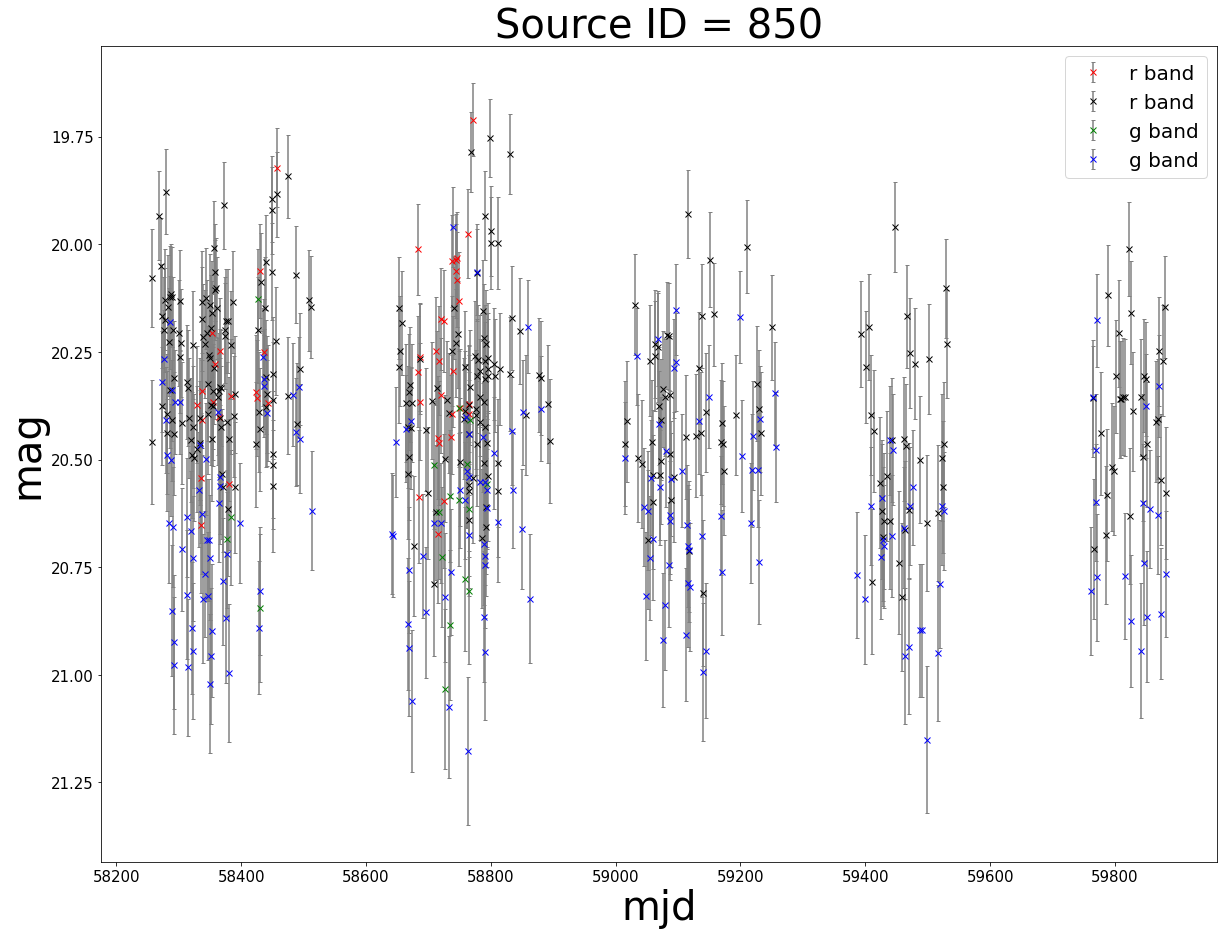

In [118]:
functions.draw_lightcurve(850)

In [115]:
nonvar_zg.show_in_notebook()

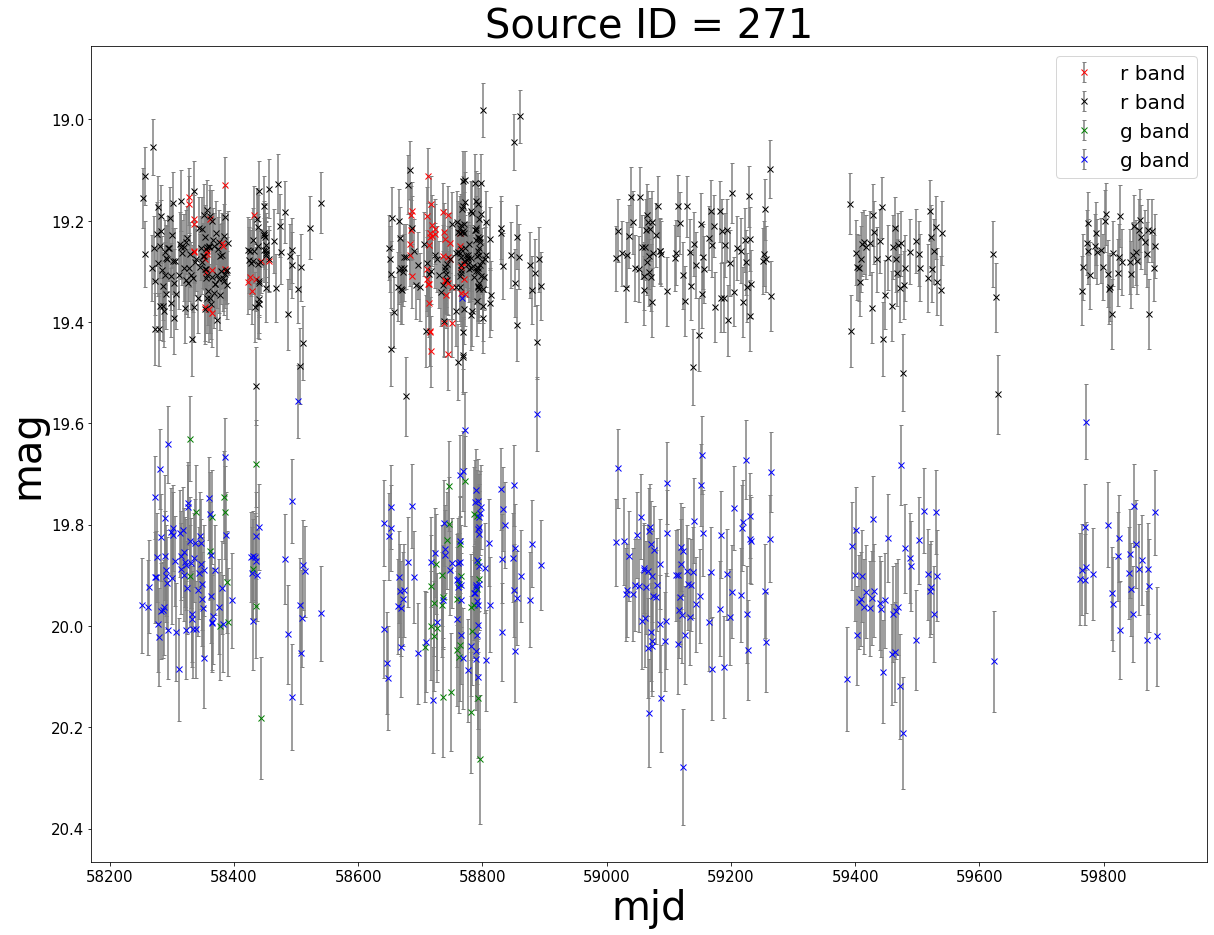

In [116]:
functions.draw_lightcurve(271)

In [75]:
t_plot

<QTable length=9>
SourceID     mean_color     ...     max_mag_g          min_mag_g     
 int32        float64       ...      float64            float64      
-------- ------------------ ... ------------------ ------------------
      73 0.8864079475402832 ... 20.794662475585938 19.153165817260742
      77 1.2697524060024303 ... 20.759401321411133 18.832887649536133
      90 0.8292514394830774 ... 19.611181259155273 18.297286987304688
     443 1.4895788304946003 ...   21.6740779876709 20.161453247070312
     959  1.292448274020491 ...  21.54222869873047  19.84897232055664
    1219 1.6213697791099548 ... 21.078689575195312 19.435989379882812
    1642 1.2746296130435568 ...  14.71679973602295   14.5626220703125
    1742  1.378161883354187 ... 21.729793548583984  19.77669334411621
    2091 0.9674321183370888 ...  20.01334571838379 18.669248580932617

In [76]:
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(nonvar_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
(t_plot['max_mag_r']-t_plot['min_mag_r']).mean(),t_plot['std_mag_r'].mean(),(t_plot['max_color']-t_plot['min_color']).mean(),t_plot['std_color'].mean()

(0.6671070418991409,
 0.09469715367605376,
 0.8590207233295574,
 0.1631466644142896)

In [77]:
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(unobj_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
(t_plot['max_mag_r']-t_plot['min_mag_r']).mean(),t_plot['std_mag_r'].mean(),(t_plot['max_color']-t_plot['min_color']).mean(),t_plot['std_color'].mean()

(0.9979933991151697,
 0.13429566264590798,
 0.9860747701981488,
 0.17861465959361011)

In [78]:
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(obj_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
(t_plot['max_mag_r']-t_plot['min_mag_r']).mean(),t_plot['std_mag_r'].mean(),(t_plot['max_color']-t_plot['min_color']).mean(),t_plot['std_color'].mean()

(0.7861508727073669,
 0.13616155344061553,
 0.839984118938446,
 0.1399782964074667)

In [79]:
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(nonvar_zg['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
(t_plot['max_mag_g']-t_plot['min_mag_g']).mean(),t_plot['std_mag_g'].mean(),(t_plot['max_color']-t_plot['min_color']).mean(),t_plot['std_color'].mean()

(0.8971893154844945,
 0.1560472096173967,
 0.8556933013760314,
 0.16063083000024062)

In [80]:
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(unobj_zg['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
(t_plot['max_mag_g']-t_plot['min_mag_g']).mean(),t_plot['std_mag_g'].mean(),(t_plot['max_color']-t_plot['min_color']).mean(),t_plot['std_color'].mean()

(1.33210242878307, 0.21771893616427074, 1.066195418617942, 0.2030616516296987)

In [81]:
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(obj_zg['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
(t_plot['max_mag_g']-t_plot['min_mag_g']).mean(),t_plot['std_mag_g'].mean(),(t_plot['max_color']-t_plot['min_color']).mean(),t_plot['std_color'].mean()

(1.4646512137518988,
 0.22986597029699218,
 1.394844479031033,
 0.20411836963548502)

In [5]:
t_zr=QTable.read('t_zr_0307.ecsv')
t_zg=QTable.read('t_zg_0307.ecsv')
t_zr=t_zr[np.isnan(t_zr['LNP_SIG'])==False]
t_zg=t_zg[np.isnan(t_zg['LNP_SIG'])==False]

In [12]:
upsilon_zr=t_zr[t_zr['upsilon_class']!='NonVar']
upsilon_zg=t_zg[t_zg['upsilon_class']!='NonVar']
upsilon_zr=upsilon_zr[upsilon_zr['upsilon_flag']==0]
upsilon_zg=upsilon_zg[upsilon_zg['upsilon_flag']==0]

In [32]:
len(np.unique(upsilon_zr['SourceID'])),len(np.unique(upsilon_zg['SourceID'])),len(np.unique(upsilon_zr[np.isin(upsilon_zr['SourceID'],upsilon_zg['SourceID'])==1]['SourceID']))

(35, 15, 4)

In [33]:
len(np.intersect1d(np.unique(obj_zr['SourceID']),np.unique(upsilon_zr['SourceID'])))

23

In [34]:
len(np.intersect1d(np.unique(obj_zg['SourceID']),np.unique(upsilon_zg['SourceID'])))

3

In [35]:
np.intersect1d(np.unique(obj_zr['SourceID']),np.unique(obj_zg['SourceID']))

array([77, 90])

In [36]:
np.intersect1d(np.unique(obj_zr['SourceID']),np.unique(upsilon_zr['SourceID']))

array([  52,   77,   90,  158,  168,  208,  210,  223,  225,  242,  265,
        354,  530,  577,  733,  778, 1169, 1259, 1299, 1555, 1706, 1744,
       2008])

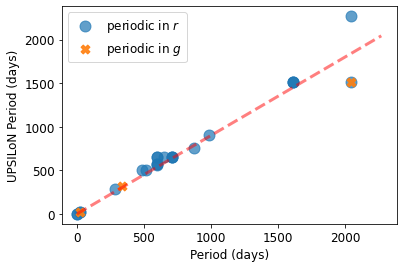

In [15]:
fs=12
ind=np.intersect1d(np.unique(obj_zr['SourceID']),np.unique(upsilon_zr['SourceID']))
t=sourcefy(t_zr)
t=t[np.isin(t['SourceID'],ind)]
plt.plot(np.linspace(0,t['upsilon_period'].max(),10),np.linspace(0,t['period'].max(),10),ls='--',c='r',alpha=0.5,lw=fs/4)
plt.scatter(t['period'],t['upsilon_period'],s=120,alpha=0.7,label='periodic in $r$')


ind=np.intersect1d(np.unique(obj_zg['SourceID']),np.unique(upsilon_zg['SourceID']))
t=sourcefy(t_zg)
t=t[np.isin(t['SourceID'],ind)]
plt.scatter(t['period'],t['upsilon_period'],s=80,marker='X',alpha=0.9,label='periodic in $g$')


plt.xlabel('Period (days)',fontsize=fs)
plt.ylabel('UPSILoN Period (days)',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)

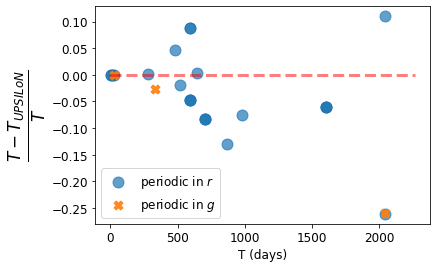

In [28]:
fs=12
ind=np.intersect1d(np.unique(obj_zr['SourceID']),np.unique(upsilon_zr['SourceID']))
t=sourcefy(t_zr)
t=t[np.isin(t['SourceID'],ind)]
plt.plot(np.linspace(0,t['upsilon_period'].max(),10),np.zeros(10),ls='--',c='r',alpha=0.5,lw=fs/4)
plt.scatter(t['period'],(t['upsilon_period']-t['period'])/t['period'],s=120,alpha=0.7,label='periodic in $r$')


ind=np.intersect1d(np.unique(obj_zg['SourceID']),np.unique(upsilon_zg['SourceID']))
t=sourcefy(t_zg)
t=t[np.isin(t['SourceID'],ind)]
plt.scatter(t['period'],(t['upsilon_period']-t['period'])/t['period'],s=80,marker='X',alpha=0.9,label='periodic in $g$')


plt.xlabel('T (days)',fontsize=fs)
plt.ylabel(r'$\frac{T-T_{UPSILoN}}{T}$',fontsize=fs*2)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)

In [89]:
upsilon_zr

<QTable length=36>
SourceID filter       OID        ... upsilon_flag    upsilon_period  
 int32    str2       str16       ...   float64          float64      
-------- ------ ---------------- ... ------------ -------------------
      50     zr  806203100056992 ...          0.0  226.33803819000025
      52     zr  806203100023276 ...          0.0   566.9630815875007
      77     zr  806203100063307 ...          0.0  26.524588612280738
      90     zr 1809211300042387 ...          0.0  1328.6934374999983
      90     zr  806203100056957 ...          0.0   2267.852326350003
     107     zr  806203100065432 ...          0.0  446.97659027999987
     158     zr  806203100057075 ...          0.0   647.9578075285723
     168     zr  806203100060423 ...          0.0  503.96718363333395
     181     zr  806203100063249 ...          0.0  1133.9261631750014
     208     zr  806203100063224 ...          0.0   647.9578075285723
     ...    ...              ... ...          ...                 ...
    1259     zr  806203100052030 ...          0.0   647.9578075285723
    1299     zr  806203100023129 ...          0.0  3.4026291468117074
    1308     zr  806203100060241 ...          0.0  1.0503104019906313
    1555     zr  806203400000196 ...          0.0   647.9578075285723
    1706     zr  806203400000031 ...          0.0  1.4579571368370317
    1744     zr  806203400000005 ...          0.0   1511.901550900002
    1818     zr  806203100051550 ...          0.0 0.21971055283375343
    2008     zr  806203400030847 ...          0.0   21.59859358428574
    2025     zr  806203100021212 ...          0.0   907.1409305400011
    2032     zr  806203400030910 ...          0.0   1511.901550900002

In [90]:
obj_zr.show_in_notebook()

In [91]:
functions.query(145)

<QTable length=2>
SourceID filter       OID        ... upsilon_flag   upsilon_period  
 int32    str2       str16       ...   float64         float64      
-------- ------ ---------------- ... ------------ ------------------
     145     zr  806203100043772 ...          0.0 1133.9261631750014
     145     zr 1809211300042604 ...          1.0 0.3332561031602737

<QTable length=2>
SourceID filter       OID        ... upsilon_flag    upsilon_period   
 int32    str2       str16       ...   float64          float64       
-------- ------ ---------------- ... ------------ --------------------
     145     zg 1809111300037359 ...          1.0 0.030445886366578186
     145     zg  806103100029929 ...          1.0   0.1915815593765839

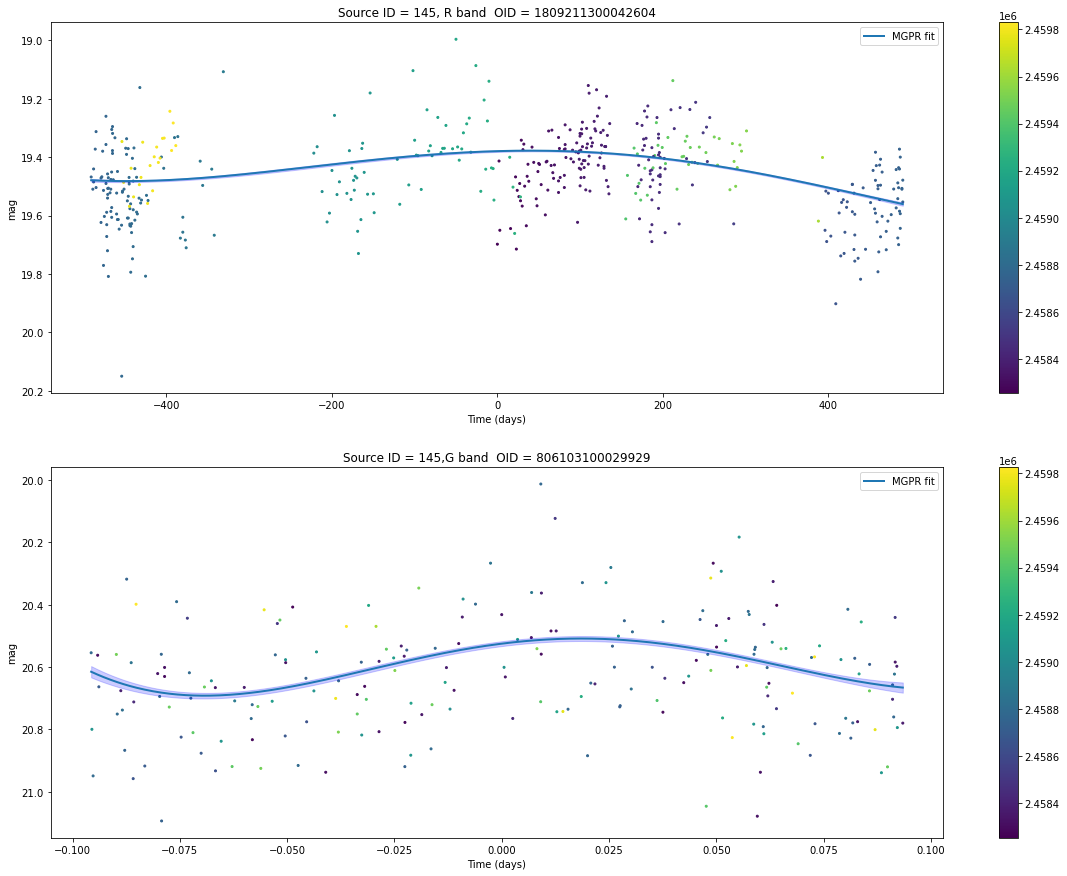

In [65]:
functions.MGPRfit(145,errscale=0.5)

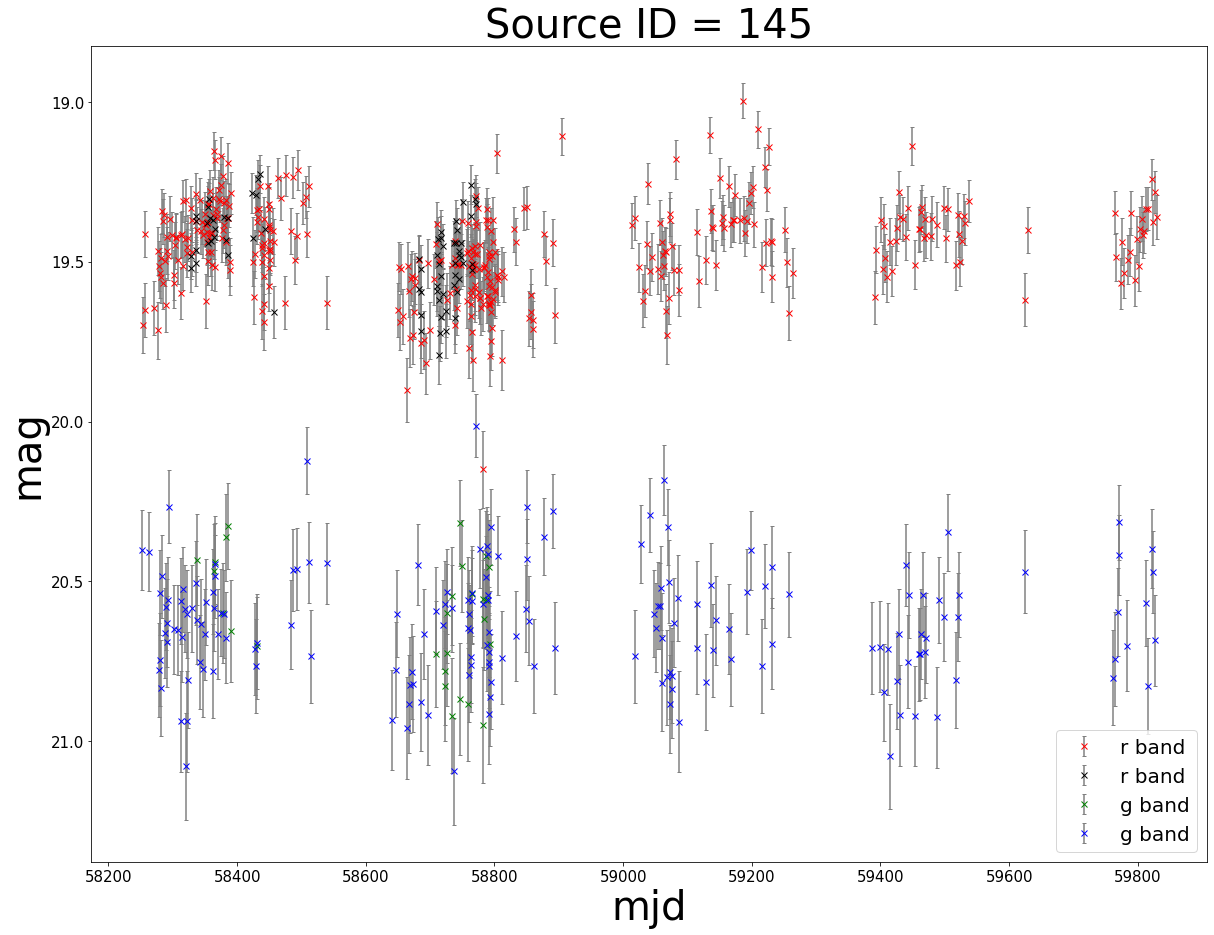

In [66]:
functions.draw_lightcurve(145)

In [67]:
functions.query(439)

<QTable length=2>
SourceID filter       OID        ... upsilon_flag   upsilon_period  
 int32    str2       str16       ...   float64         float64      
-------- ------ ---------------- ... ------------ ------------------
     439     zr 1809211300042148 ...          1.0 1.3909859943336642
     439     zr  806203100043284 ...          1.0 1.0006102484084891

<QTable length=0>
SourceID filter  OID     RA   ... upsilon_prob upsilon_flag upsilon_period
 int32    str2  str16 float64 ...   float64      float64       float64    
-------- ------ ----- ------- ... ------------ ------------ --------------

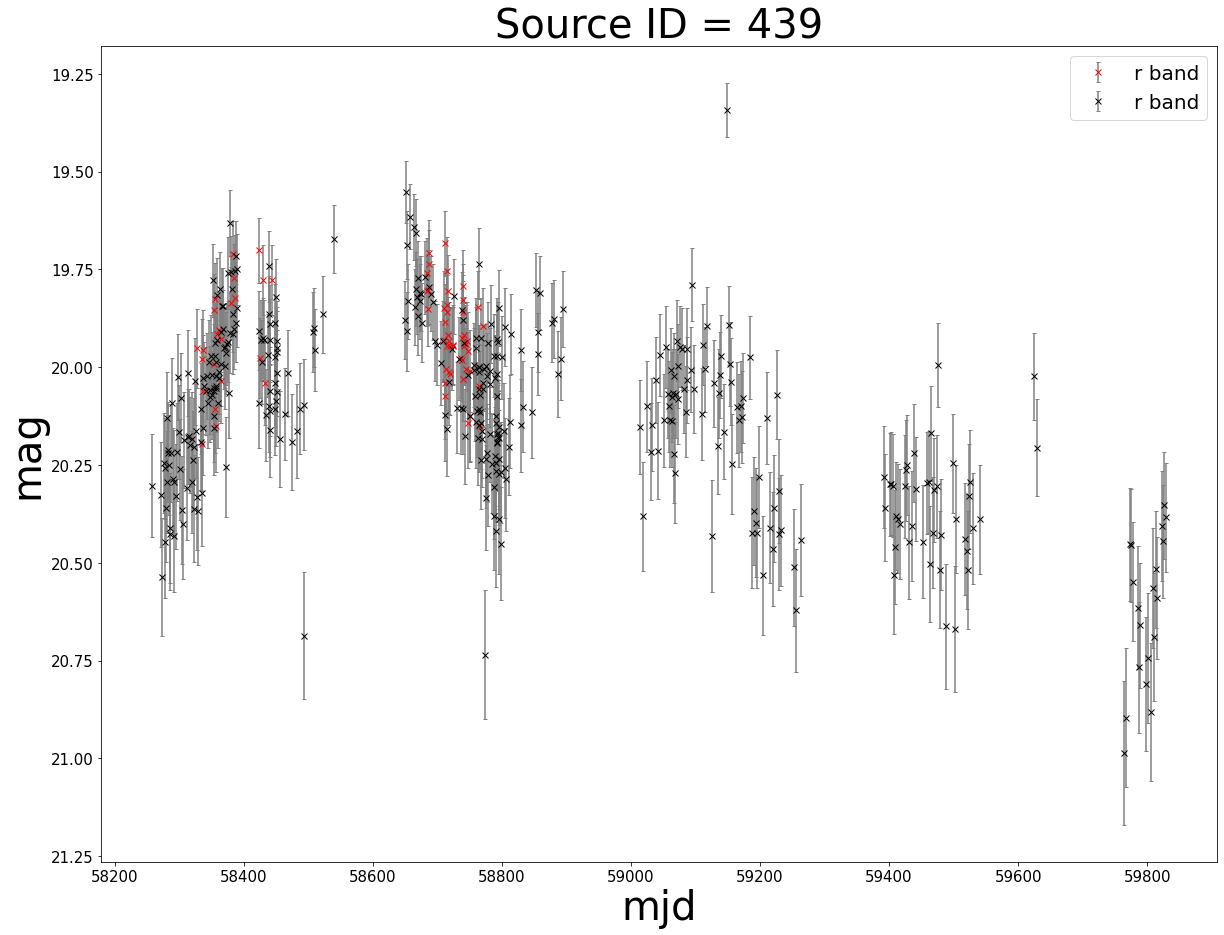

In [68]:
functions.draw_lightcurve(439)

L-S_period: 238.04133729120863
fit_period: 250.99096775082512
sin_chi2: 3.73211289


ValueError: attempt to get argmax of an empty sequence

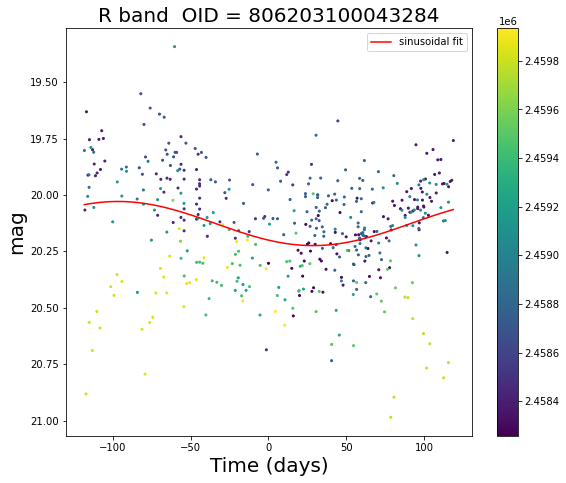

In [2]:
functions.sinfit_single(439)

In [70]:
functions.query(2813)

<QTable length=1>
SourceID filter       OID       ... upsilon_prob upsilon_flag   upsilon_period  
 int32    str2       str16      ...   float64      float64         float64      
-------- ------ --------------- ... ------------ ------------ ------------------
    2813     zr 806203400051460 ...         0.38          1.0 1909.2845833499996

<QTable length=0>
SourceID filter  OID     RA   ... upsilon_prob upsilon_flag upsilon_period
 int32    str2  str16 float64 ...   float64      float64       float64    
-------- ------ ----- ------- ... ------------ ------------ --------------

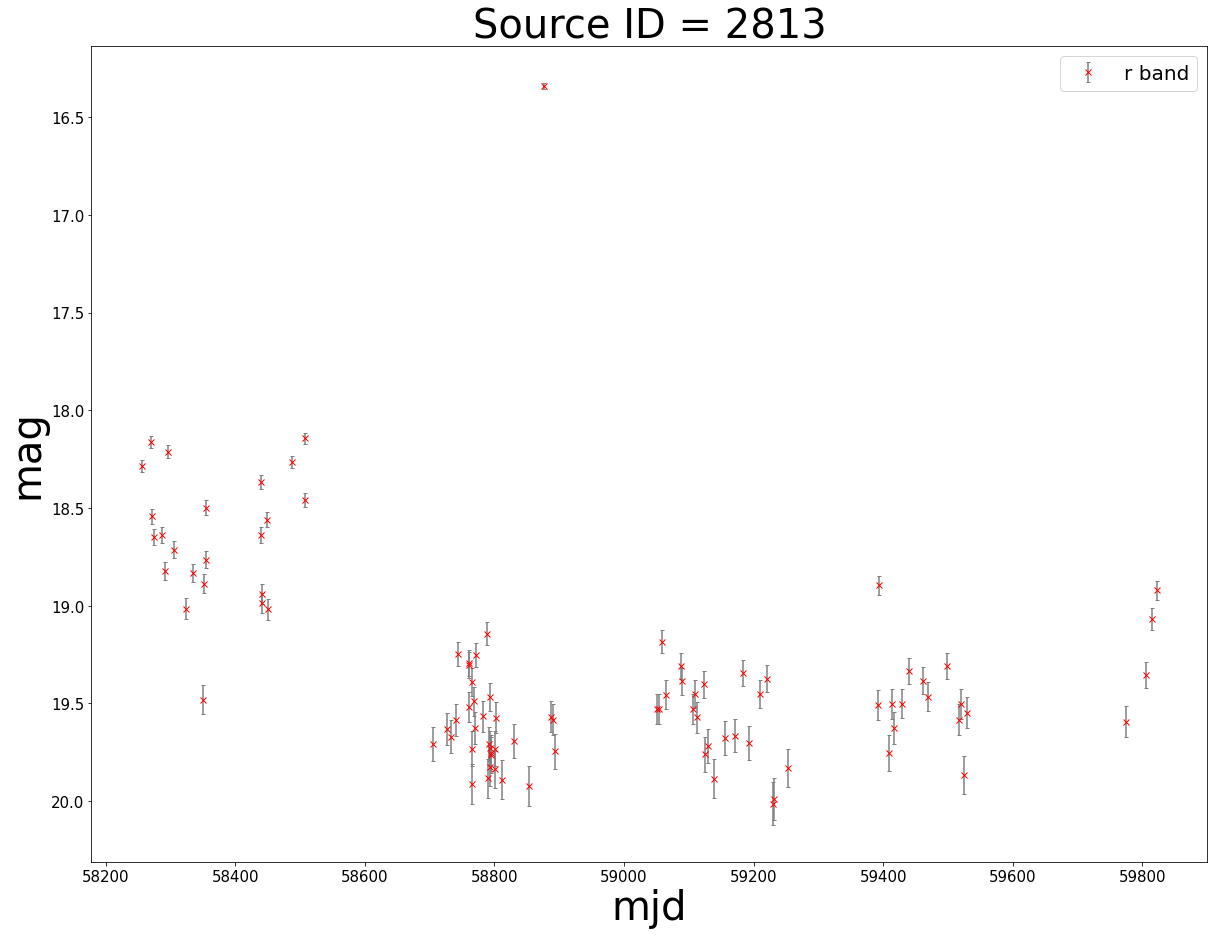

In [71]:
functions.draw_lightcurve(2813)

L-S_period: 368.4535100727675
fit_period: 371.32959488030764
sin_chi2: 439.89170967


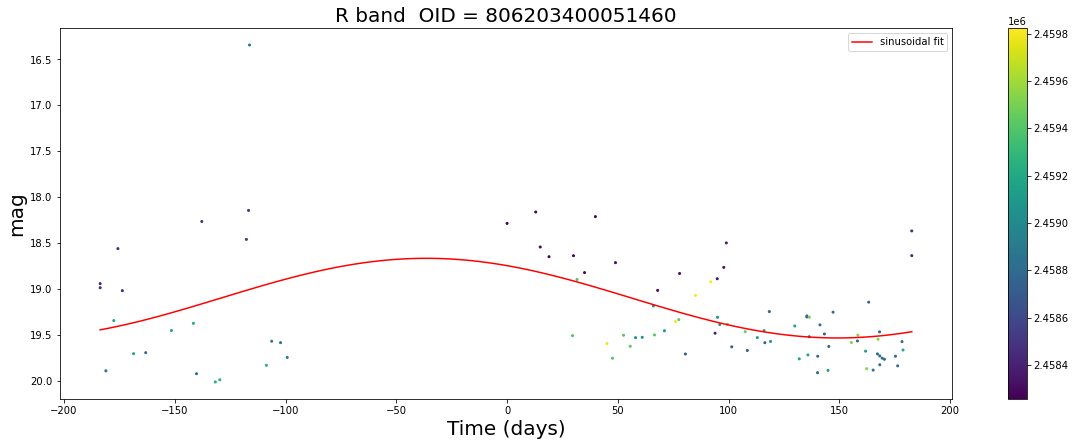

In [72]:
functions.sinfit(2813)

In [73]:
functions.query(50)

<QTable length=2>
SourceID filter       OID        ... upsilon_flag   upsilon_period  
 int32    str2       str16       ...   float64         float64      
-------- ------ ---------------- ... ------------ ------------------
      50     zr  806203100056992 ...          0.0 226.33803819000025
      50     zr 1809211300070206 ...          1.0  652.2697222499955

<QTable length=0>
SourceID filter  OID     RA   ... upsilon_prob upsilon_flag upsilon_period
 int32    str2  str16 float64 ...   float64      float64       float64    
-------- ------ ----- ------- ... ------------ ------------ --------------

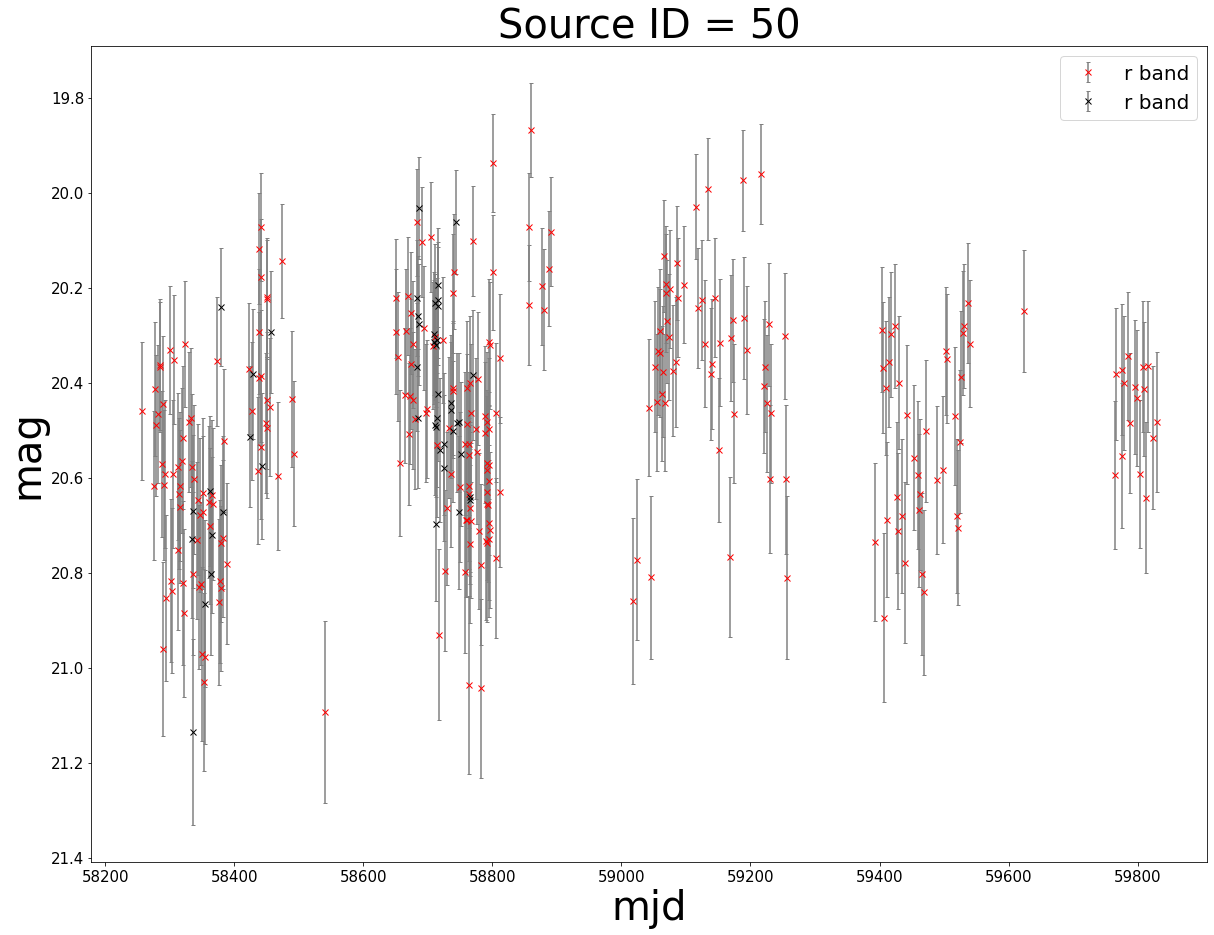

In [74]:
functions.draw_lightcurve(50)

No data found in G band


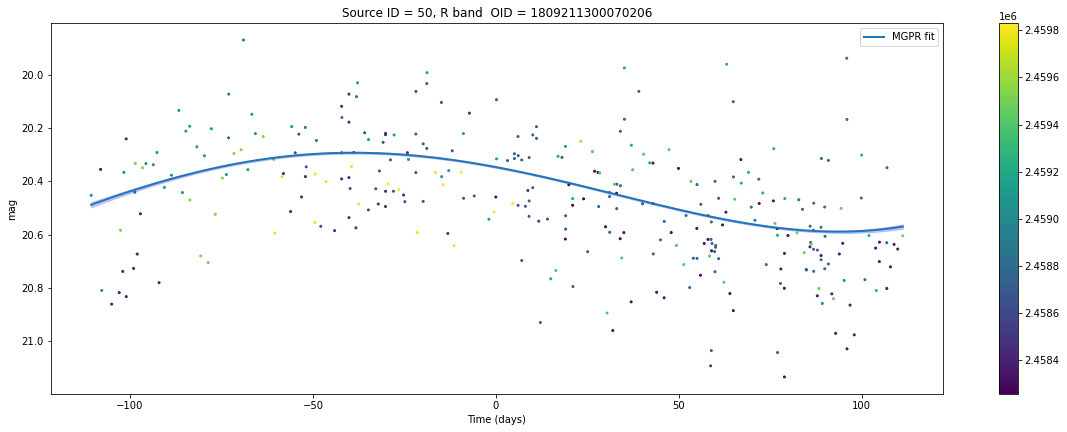

In [75]:
functions.MGPRfit(50,errscale=0.25)

L-S_period: 223.91194916677907
fit_period: 242.9900373526693
sin_chi2: 2.02224829


ValueError: attempt to get argmax of an empty sequence

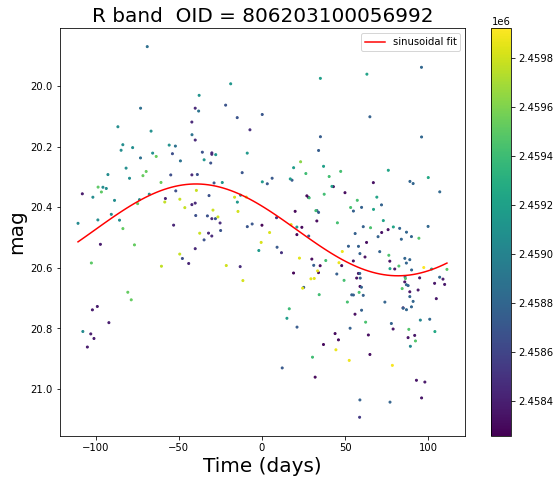

In [3]:
functions.sinfit_single(50)

In [96]:
t=obj_zr
simbad=np.zeros((len(t),2))
for i,row in enumerate(t):
    simbad[i,0]=row['RA']
    simbad[i,1]=row['DEC']
np.savetxt('simbad_periodic_zr.txt',simbad,fmt='%.18f')

In [97]:
t=obj_zg
simbad=np.zeros((len(t),2))
for i,row in enumerate(t):
    simbad[i,0]=row['RA']
    simbad[i,1]=row['DEC']
np.savetxt('simbad_periodic_zg.txt',simbad,fmt='%.18f')

In [116]:
t=np.unique(unobj_zr['SourceID'])
simbad=np.zeros((len(t),2))
for i,row in enumerate(t):
    simbad[i,0]=np.mean(unobj_zr[unobj_zr['SourceID']==row]['RA'])
    simbad[i,1]=np.mean(unobj_zr[unobj_zr['SourceID']==row]['DEC'])
np.savetxt('simbad_nonperiodic_zr.txt',simbad,fmt='%.18f')

In [117]:
t=np.unique(unobj_zg['SourceID'])
simbad=np.zeros((len(t),2))
for i,row in enumerate(t):
    simbad[i,0]=np.mean(unobj_zg[unobj_zg['SourceID']==row]['RA'])
    simbad[i,1]=np.mean(unobj_zg[unobj_zg['SourceID']==row]['DEC'])
np.savetxt('simbad_nonperiodic_zg.txt',simbad,fmt='%.18f')

In [2]:
functions.query(1299)

<QTable length=2>
SourceID filter       OID        ... upsilon_flag   upsilon_period  
 int32    str2       str16       ...   float64         float64      
-------- ------ ---------------- ... ------------ ------------------
    1299     zr  806203100023129 ...          0.0 3.4026291468117074
    1299     zr 1809211300007283 ...          1.0 3.4069062499999956

<QTable length=2>
SourceID filter       OID        ... upsilon_flag    upsilon_period  
 int32    str2       str16       ...   float64          float64      
-------- ------ ---------------- ... ------------ -------------------
    1299     zg  806103100019786 ...          0.0    3.40276444096024
    1299     zg 1809111300037238 ...          1.0 0.03187954314595965

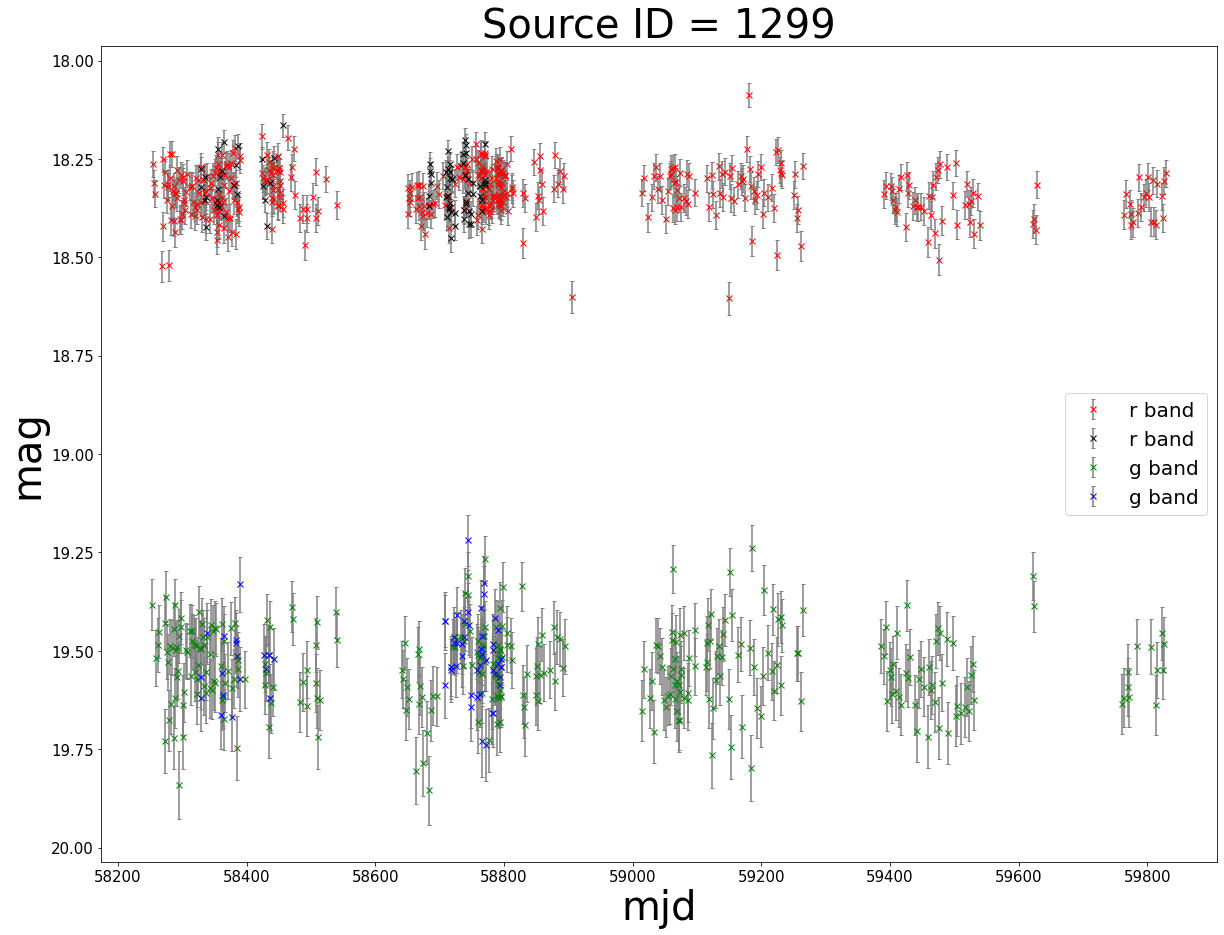

In [4]:
functions.draw_lightcurve(1299)

L-S_period: 3.4010475333652077
fit_period: 3.686092151640014
sin_chi2: 2.01684047
L-S_period: 3.4011826003596766
fit_period: 3.0782400473109908
sin_chi2: 1.83895577


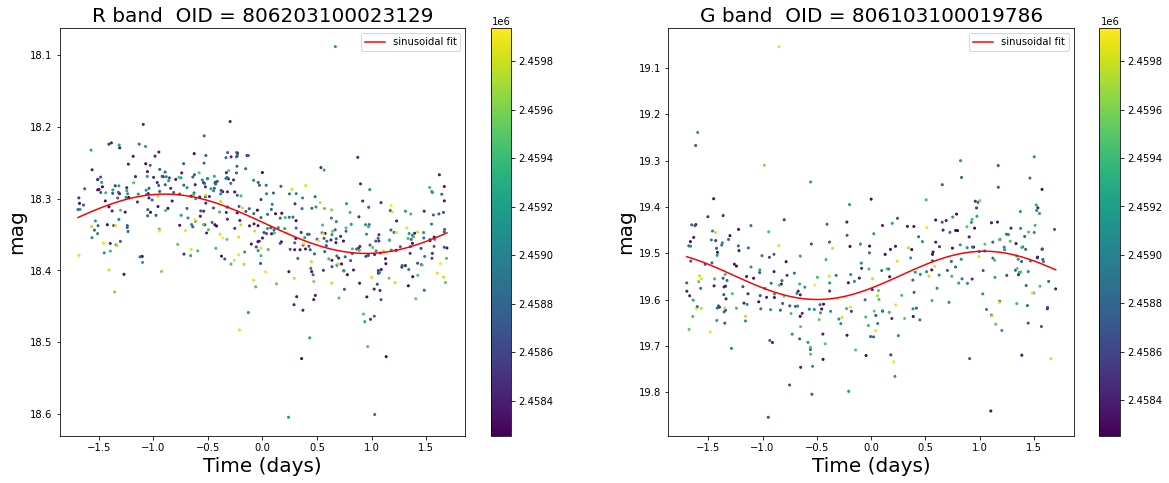

In [4]:
functions.sinfit_single(1299)

In [137]:
len(sourcefy(obj_zr)),len(sourcefy(obj_zr[np.isnan(obj_zr['dist'])==False]))

(32, 14)

In [138]:
len(sourcefy(obj_zg)),len(sourcefy(obj_zg[np.isnan(obj_zg['dist'])==False]))

(9, 3)

In [139]:
len(sourcefy(unobj_zr)),len(sourcefy(unobj_zr[np.isnan(unobj_zr['dist'])==False]))

(155, 43)

In [140]:
len(sourcefy(unobj_zg)),len(sourcefy(unobj_zg[np.isnan(unobj_zg['dist'])==False]))

(88, 26)

In [129]:
len(sourcefy(obj_zr)),len(sourcefy(obj_zr[obj_zr['Gaia_count']!=0]))

(32, 28)

In [131]:
len(sourcefy(obj_zg)),len(sourcefy(obj_zg[obj_zg['Gaia_count']!=0]))

(9, 9)

In [133]:
len(sourcefy(unobj_zr)),len(sourcefy(unobj_zr[unobj_zr['Gaia_count']!=0]))

(155, 100)

In [134]:
len(sourcefy(unobj_zg)),len(sourcefy(unobj_zg[unobj_zg['Gaia_count']!=0]))

(88, 67)

In [3]:
XMM_zr=QTable.read('XMM_Wang_zr.csv')
XMM_zg=QTable.read('XMM_Wang_zg.csv')
Chandra_zr=QTable.read('Chandra_zr.csv')
Chandra_zg=QTable.read('Chandra_zg.csv')

In [4]:
t_zr[np.isin(t_zr['SourceID'],XMM_zr['SourceID'])]

<QTable length=5>
SourceID filter       OID            RA    ... Plxflag var  lc_var var_flag
 int32    str2       str16        float64  ...  int32  str1  str1    bool  
-------- ------ ---------------- --------- ... ------- ---- ------ --------
     382     zr  806203100023154  5.108304 ...       1    N      N    False
     382     zr 1809211300042378 5.1083141 ...       1    N      N    False
     889     zr 1809211300066832 5.1209659 ...       0    N      N    False
    1843     zr  806203100023114 5.1778086 ...       1    P      P    False
    1843     zr 1809211300007269 5.1778341 ...       1    P      V    False

In [5]:
t_zg[np.isin(t_zg['SourceID'],XMM_zg['SourceID'])]

<QTable length=4>
SourceID filter       OID            RA    ... Plxflag var  lc_var var_flag
 int32    str2       str16        float64  ...  int32  str1  str1    bool  
-------- ------ ---------------- --------- ... ------- ---- ------ --------
     382     zg 1809111300028558 5.1083068 ...       1    N      N    False
     382     zg  806103100029765 5.1083193 ...       1    N      N    False
    1843     zg  806103100036139 5.1778247 ...       1    N      N    False
    1843     zg 1809111300004711 5.1778359 ...       1    N      N    False

In [6]:
t_zr[np.isin(t_zr['SourceID'],Chandra_zr['SourceID'])]

<QTable length=40>
SourceID filter       OID            RA    ... Plxflag var  lc_var var_flag
 int32    str2       str16        float64  ...  int32  str1  str1    bool  
-------- ------ ---------------- --------- ... ------- ---- ------ --------
      77     zr  806203100063307 5.0870906 ...       0    P      P    False
      77     zr 1809211300074746 5.0870934 ...       0    P      P    False
     131     zr 1809211300061962  5.048199 ...       1    N      N    False
     131     zr  806203100043680 5.0481869 ...       1    N      N    False
     158     zr  806203100057075 5.0953672 ...       0    P      P    False
     158     zr 1809211300042636 5.0953685 ...       0    P      P    False
     356     zr  806203100060336 5.0425849 ...       0    N      N    False
     356     zr 1809211300061855 5.0424565 ...       0    N      N    False
     364     zr  806203100052214 5.0378403 ...       0    N      N    False
     364     zr 1809211300054560 5.0378437 ...       0    N      N    False
     ...    ...              ...       ... ...     ...  ...    ...      ...
    1686     zr 1809211300005619 5.1195895 ...       1    N      N    False
    1686     zr  806203100021744 5.1195829 ...       1    N      N    False
    1744     zr  806203400000005 5.1440952 ...       0    P      P    False
    1744     zr 1809211300009418  5.144109 ...       0    P      N    False
    1843     zr  806203100023114 5.1778086 ...       1    P      P    False
    1843     zr 1809211300007269 5.1778341 ...       1    P      V    False
    2008     zr  806203400030847  5.110891 ...       1    P      P    False
    2008     zr 1809211300010175 5.1109043 ...       1    P      P    False
    2108     zr 1809211300009693 4.9944914 ...       0    N      N    False
    2108     zr  806203400030606 4.9944682 ...       0    N      N    False

In [7]:
t_zg[np.isin(t_zg['SourceID'],Chandra_zg['SourceID'])]

<QTable length=28>
SourceID filter       OID            RA    ... Plxflag var  lc_var var_flag
 int32    str2       str16        float64  ...  int32  str1  str1    bool  
-------- ------ ---------------- --------- ... ------- ---- ------ --------
      77     zg 1809111300028707 5.0869088 ...       0    P      N    False
      77     zg  806103100029923 5.0869784 ...       0    P      P    False
     131     zg  806103100042702 5.0482513 ...       1    N      N    False
     131     zg 1809111300004928 5.0481507 ...       1    N      N    False
     158     zg 1809111300037377  5.095539 ...       0    N      N    False
     158     zg  806103100042723 5.0956278 ...       0    N      N    False
     364     zg  806103100040297 5.0380081 ...       0    N      N    False
     382     zg 1809111300028558 5.1083068 ...       1    N      N    False
     382     zg  806103100029765 5.1083193 ...       1    N      N    False
    1043     zg  806103100020075 4.9986645 ...       0    N      N    False
     ...    ...              ...       ... ...     ...  ...    ...      ...
    1686     zg  806103100035875 5.1194422 ...       1    N      N    False
    1686     zg 1809111300003639  5.119533 ...       1    N      N    False
    1744     zg  806103400020600 5.1440845 ...       0    N      N    False
    1744     zg 1809111300006121 5.1441101 ...       0    N      N    False
    1843     zg  806103100036139 5.1778247 ...       1    N      N    False
    1843     zg 1809111300004711 5.1778359 ...       1    N      N    False
    2008     zg  806103400000320 5.1108963 ...       1    V      V    False
    2008     zg 1809111300006633 5.1109104 ...       1    V      P    False
    2108     zg  806103400020659  4.994544 ...       0    V      V    False
    2108     zg 1809111300029210 4.9944627 ...       0    V      N    False

<QTable length=22>
SourceID filter       OID            RA    ... Plxflag var  lc_var var_flag
 int32    str2       str16        float64  ...  int32  str1  str1    bool  
-------- ------ ---------------- --------- ... ------- ---- ------ --------
      77     zr  806203100063307 5.0870906 ...       0    P      P    False
     131     zr  806203100043680 5.0481869 ...       1    N      N    False
     158     zr  806203100057075 5.0953672 ...       0    P      P    False
     356     zr  806203100060336 5.0425849 ...       0    N      N    False
     364     zr  806203100052214 5.0378403 ...       0    N      N    False
     382     zr  806203100023154  5.108304 ...       1    N      N    False
     419     zr 1809211300054308 5.0332672 ...       0    N      N    False
    2405     zr 1809211300054805  5.053282 ...       0    N      N    False
     889     zr 1809211300066832 5.1209659 ...       0    N      N    False
    1043     zr  806203100052133 4.9987967 ...       0    N      N    False
    1139     zr  806203100022270 5.1187805 ...       1    N      N    False
    1299     zr  806203100023129 5.1539289 ...       1    P      P    False
    1308     zr  806203100060241 5.1182736 ...       0    N      N    False
    1364     zr  806203400000068 5.0950151 ...       1    N      N    False
    1391     zr  806203400030505 5.0365555 ...       1    V      V    False
    1453     zr  806203100063345 5.1612864 ...       0    N      N    False
    1623     zr  806203100060536 4.9780072 ...       1    V      V    False
    1686     zr  806203100021744 5.1195829 ...       1    N      N    False
    1744     zr  806203400000005 5.1440952 ...       0    P      P    False
    1843     zr  806203100023114 5.1778086 ...       1    P      P    False
    2008     zr  806203400030847  5.110891 ...       1    P      P    False
    2108     zr  806203400030606 4.9944682 ...       0    N      N    False

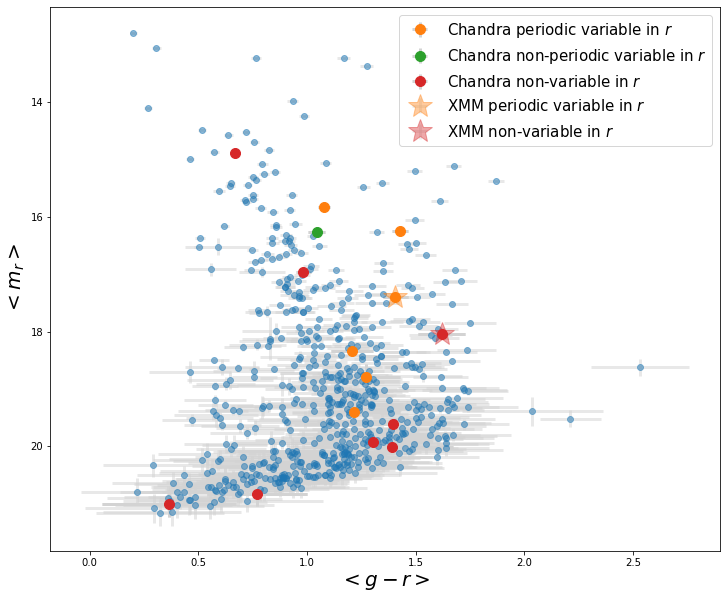

In [61]:
plt.figure(figsize=(12,10))
plt.gca().invert_yaxis()
plt.xlabel('$<g - r>$',fontsize=20)
plt.ylabel('$<m_r>$',fontsize=20)
alpha=1

# all
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(t_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
plt.errorbar(t_plot['mean_color'],t_plot['mean_mag_r'],xerr=t_plot['std_color'],yerr=t_plot['std_mag_r'],fmt='o',
             ecolor='lightgray', elinewidth=3, capsize=0,alpha=0.5)

color_dic={'P':'#ff7f0e','V':'#2ca02c','N':'#d62728'}

var_dic={'P':'Chandra periodic variable in $r$','V':'Chandra non-periodic variable in $r$','N':'Chandra non-variable in $r$'}
for var in ['P','V','N']:
    t_Chandra_zr=sourcefy(t_zr[np.isin(t_zr['SourceID'],Chandra_zr['SourceID'])])
    t_plot=t_color[np.isin(t_color['SourceID'],np.unique(t_Chandra_zr[t_Chandra_zr['var']==var]['SourceID']))]
    t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
    plt.errorbar(t_plot['mean_color'],t_plot['mean_mag_r'],xerr=t_plot['std_color'],yerr=t_plot['std_mag_r'],fmt='o',markersize=10,
                 ecolor='lightgray', elinewidth=3, capsize=0,alpha=1,label=var_dic[var],markerfacecolor=color_dic[var],markeredgecolor=color_dic[var])
    
var_dic={'P':'XMM periodic variable in $r$','V':'XMM non-periodic variable in $r$','N':'XMM non-variable in $r$'}
for var in ['P','V','N']:
    t_XMM_zr=sourcefy(t_zr[np.isin(t_zr['SourceID'],XMM_zr['SourceID'])])
    t_plot=t_color[np.isin(t_color['SourceID'],np.unique(t_XMM_zr[t_XMM_zr['var']==var]['SourceID']))]
    if len(t_plot)!=0:
        t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
        plt.errorbar(t_plot['mean_color'],t_plot['mean_mag_r'],xerr=t_plot['std_color'],yerr=t_plot['std_mag_r'],fmt='*',markersize=25,
                     ecolor='lightgray', elinewidth=3, capsize=0,alpha=0.4,label=var_dic[var],markerfacecolor=color_dic[var],markeredgecolor=color_dic[var])


#plt.xlim(0,2)
#plt.ylim(21,18)
plt.legend(loc=0,fontsize=15)

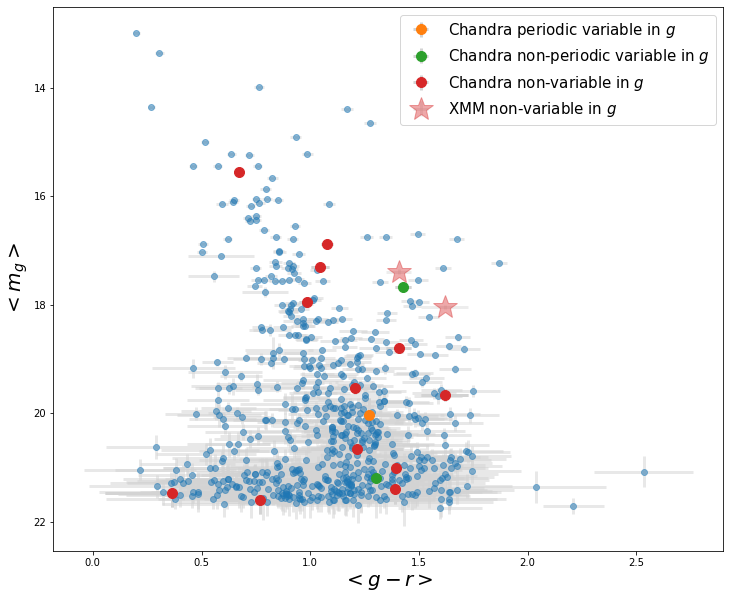

In [62]:
plt.figure(figsize=(12,10))
plt.gca().invert_yaxis()
plt.xlabel('$<g - r>$',fontsize=20)
plt.ylabel('$<m_g>$',fontsize=20)
alpha=1

# all
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(t_zg['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
plt.errorbar(t_plot['mean_color'],t_plot['mean_mag_g'],xerr=t_plot['std_color'],yerr=t_plot['std_mag_g'],fmt='o',
             ecolor='lightgray', elinewidth=3, capsize=0,alpha=0.5)

color_dic={'P':'#ff7f0e','V':'#2ca02c','N':'#d62728'}

var_dic={'P':'Chandra periodic variable in $g$','V':'Chandra non-periodic variable in $g$','N':'Chandra non-variable in $g$'}
for var in ['P','V','N']:
    t_Chandra_zg=sourcefy(t_zg[np.isin(t_zg['SourceID'],Chandra_zg['SourceID'])])
    t_plot=t_color[np.isin(t_color['SourceID'],np.unique(t_Chandra_zg[t_Chandra_zg['var']==var]['SourceID']))]
    t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
    plt.errorbar(t_plot['mean_color'],t_plot['mean_mag_g'],xerr=t_plot['std_color'],yerr=t_plot['std_mag_g'],fmt='o',markersize=10,
                 ecolor='lightgray', elinewidth=3, capsize=0,alpha=1,label=var_dic[var],markerfacecolor=color_dic[var],markeredgecolor=color_dic[var])
    
var_dic={'P':'XMM periodic variable in $g$','V':'XMM non-periodic variable in $g$','N':'XMM non-variable in $g$'}
for var in ['P','V','N']:
    t_XMM_zg=sourcefy(t_zg[np.isin(t_zg['SourceID'],XMM_zg['SourceID'])])
    t_plot=t_color[np.isin(t_color['SourceID'],np.unique(t_XMM_zg[t_XMM_zg['var']==var]['SourceID']))]
    if len(t_plot)!=0:
        t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
        plt.errorbar(t_plot['mean_color'],t_plot['mean_mag_r'],xerr=t_plot['std_color'],yerr=t_plot['std_mag_r'],fmt='*',markersize=25,
                     ecolor='lightgray', elinewidth=3, capsize=0,alpha=0.4,label=var_dic[var],markerfacecolor=color_dic[var],markeredgecolor=color_dic[var])


#plt.xlim(0,2)
#plt.ylim(21,18)
plt.legend(loc=0,fontsize=15)

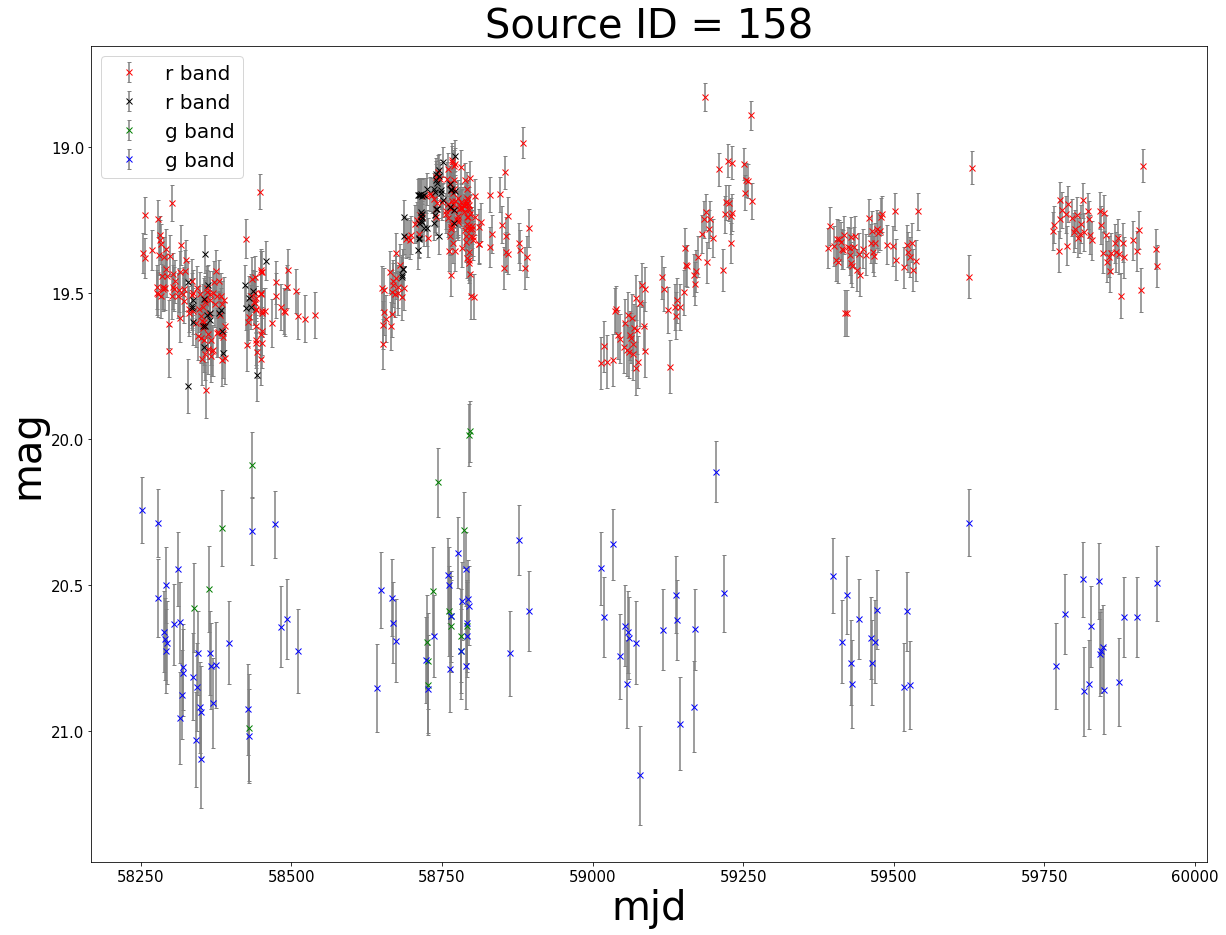

In [2]:
functions.draw_lightcurve(158)